###  1.1 Importing The Dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
df= pd.read_csv("../project1.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\3327749575.py:8: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("../project1.csv")


In [2]:
df.shape

(364558, 53)

### 1.2 Visualize the DataSet

In [3]:
pd.set_option("display.max_columns", 80)
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [4]:
df["Vehicle Type"].nunique()

0

In [5]:
df.tail(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,01/01/2015 12:20:33 AM,09 MANHATTAN,MANHATTAN,997847.0,238629.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,01/01/2015 02:42:22 AM,12 BRONX,BRONX,1024816.0,262237.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,135 STREET,ROCKAWAY BOULEVARD,SUTTER AVENUE,NaN,NaN,ADDRESS,SOUTH OZONE PARK,NaN,Precinct,Closed,01/01/2015 08:00:50 AM,The Police Department responded to the complai...,01/01/2015 02:47:50 AM,10 QUEENS,QUEENS,1038733.0,184971.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


### 1.3 Print the Columns of the dataset

In [6]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### 1.4 Identify the shape of the Dataset

In [7]:
df.shape

(364558, 53)

In [8]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


### Identyfy the Variables with null values >0

In [9]:
df.isnull().sum()[df.isnull().sum()>0]

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
X Coordinate (State Plane)          4030
Y Coordinate (State Plane)          4030
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Loc

### 2.1Draw a frequency plot to show the number of null values in each column of the DataFrame

In [10]:

null_values = df.isnull().sum()
print(null_values)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

<Axes: >

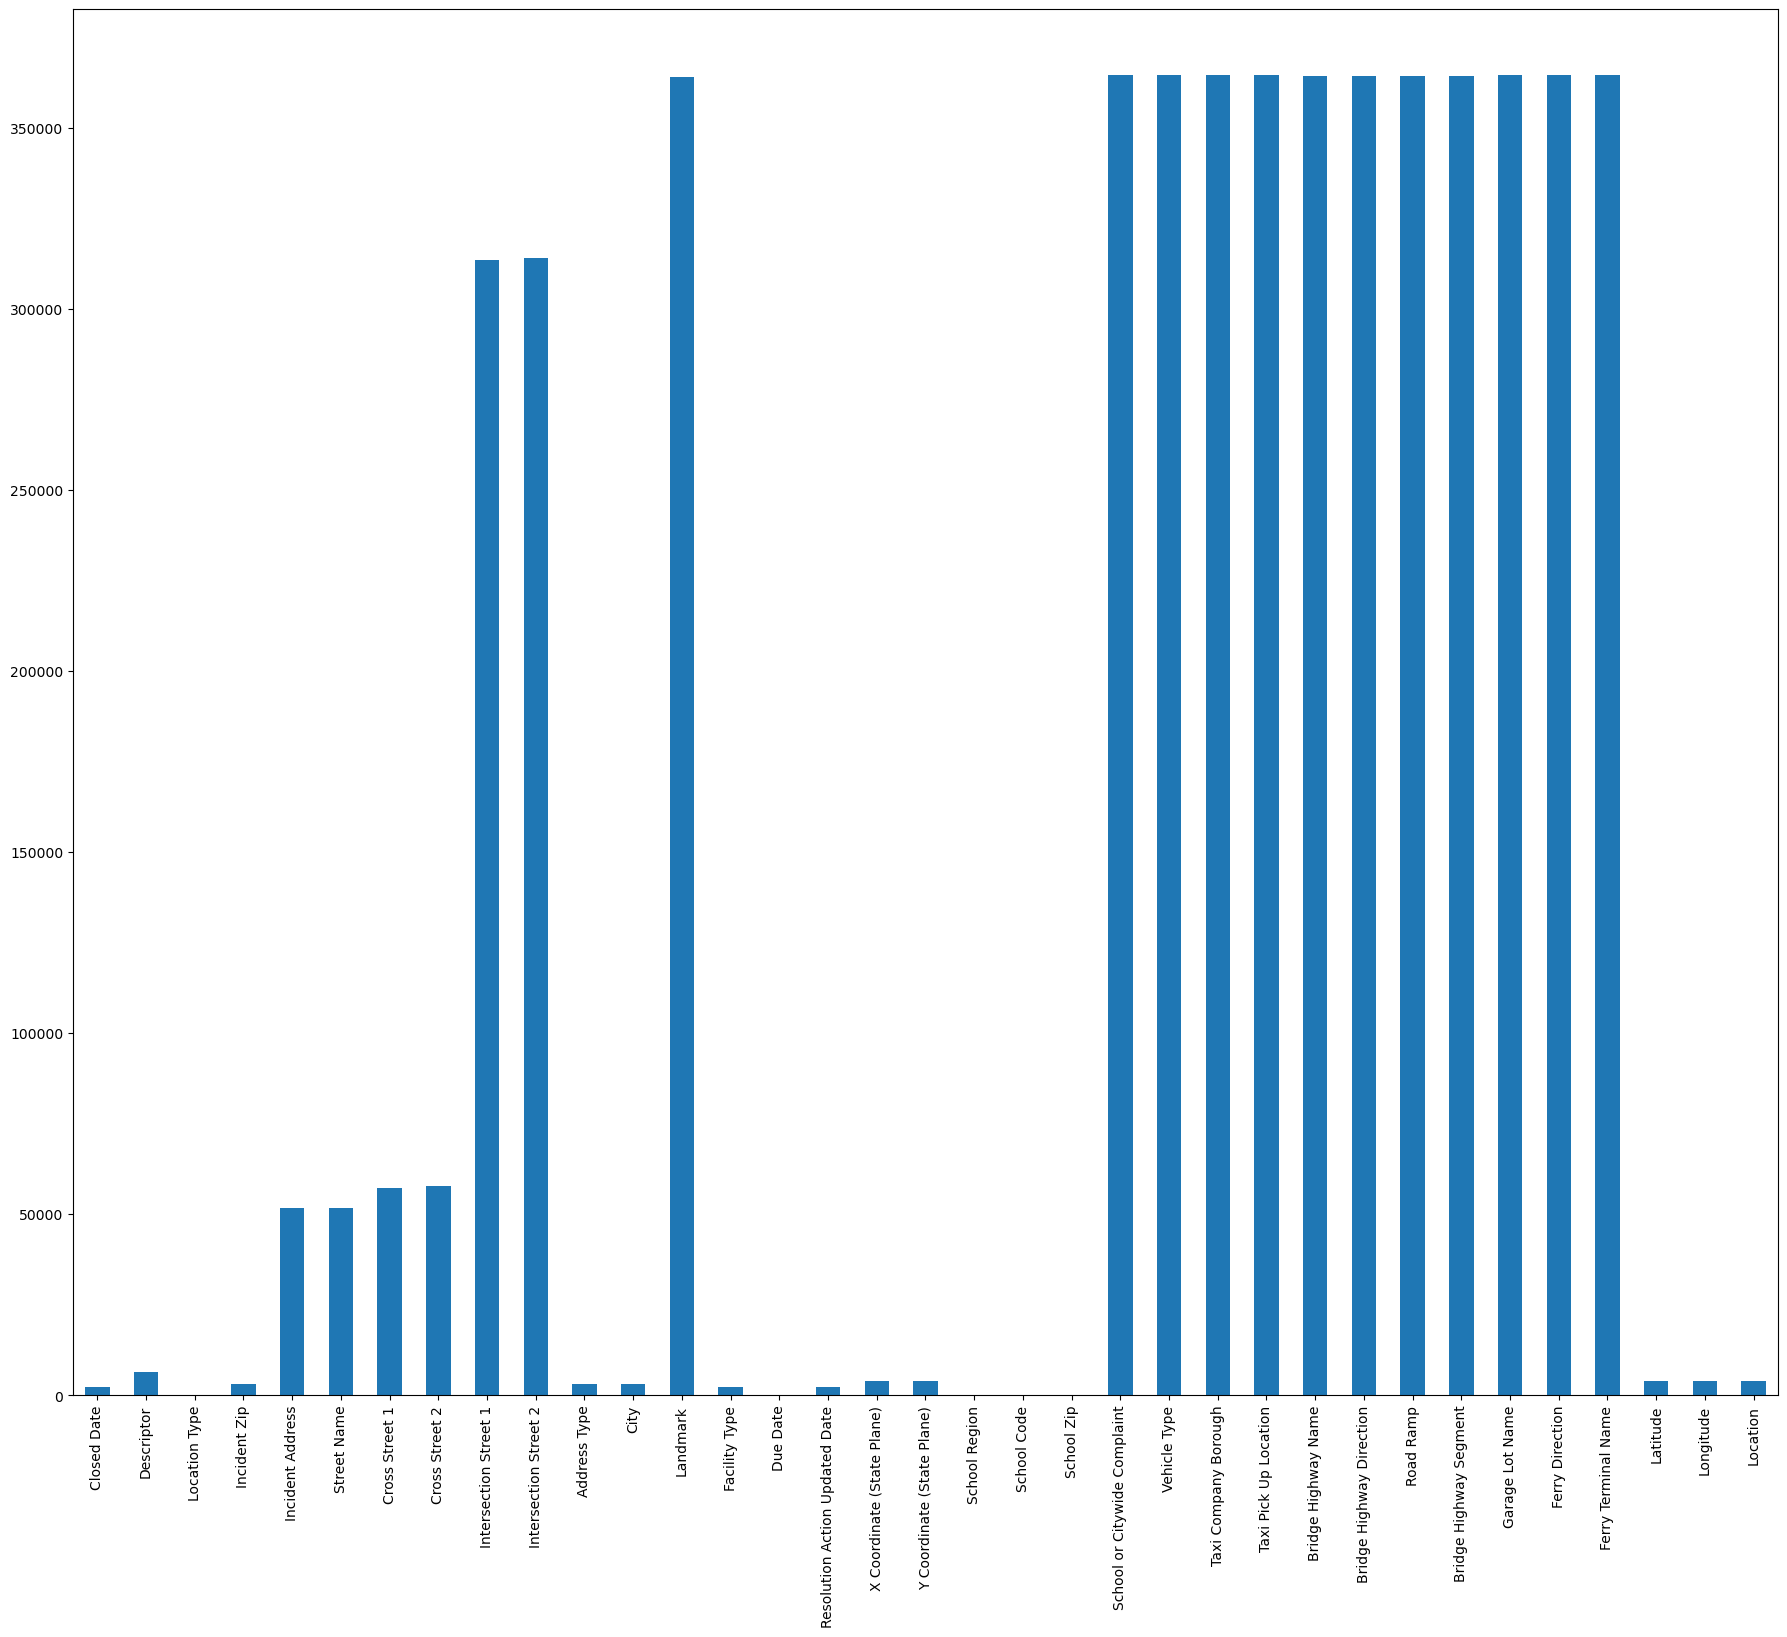

In [11]:
null_values = df.isnull().sum()[df.isnull().sum()>0]
plt.figure(figsize=(22,18))
null_values.plot(kind="bar")

### Missing value treatment
### Remove the records whose Closed Datevalues are null

In [12]:
df = df[pd.notnull(df["Closed Date"])]

In [13]:
df["Closed Date"]

0         01/01/2016 12:55:15 AM
1         01/01/2016 01:26:57 AM
2         01/01/2016 04:51:03 AM
3         01/01/2016 07:43:13 AM
4         01/01/2016 03:24:42 AM
                   ...          
364553    01/01/2015 10:22:31 AM
364554    01/01/2015 02:25:02 AM
364555    01/01/2015 12:20:33 AM
364556    01/01/2015 02:42:22 AM
364557    01/01/2015 02:47:50 AM
Name: Closed Date, Length: 362177, dtype: object

In [148]:
df["Closed Date"].isnull().sum()

2381

## 2.3Analyze the date column,and remove entries that have an incorrect timeline
#### 2.3.1Calculate the time elapsed in closed and creation date
 

In [147]:
df= pd.read_csv("../project1.csv", parse_dates=['Created Date', 'Closed Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\1628025763.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("../project1.csv", parse_dates=['Created Date', 'Closed Date'])


In [16]:
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"]

In [17]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13


###  2.3.2Convert the calculated date to seconds to get a better representation

In [18]:

df["Request_Closing_Time"]= df["Request_Closing_Time"].dt.total_seconds()

In [19]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0


### 2.3.3View the descriptive statistics for the newly created column

In [20]:
df["Request_Closing_Time"].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

### 2.3.4 Check the number of null values in the Complaint_Typeand Citycolumns

In [21]:
df[["Complaint Type", "City"]].isnull().sum()

Complaint Type       0
City              2997
dtype: int64

In [22]:
df["City"].fillna("Unknown City", inplace=True)

### 2.3.5Impute the NA value with Unknown City

In [23]:
df["City"].isnull().sum()

0

In [24]:
df["City"].value_counts().head(10)

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
ASTORIA            7991
FLUSHING           7487
RIDGEWOOD          6392
CORONA             5383
WOODSIDE           4357
Name: City, dtype: int64

###  2.3.6Draw a frequency plot for the complaints in each city

<Axes: >

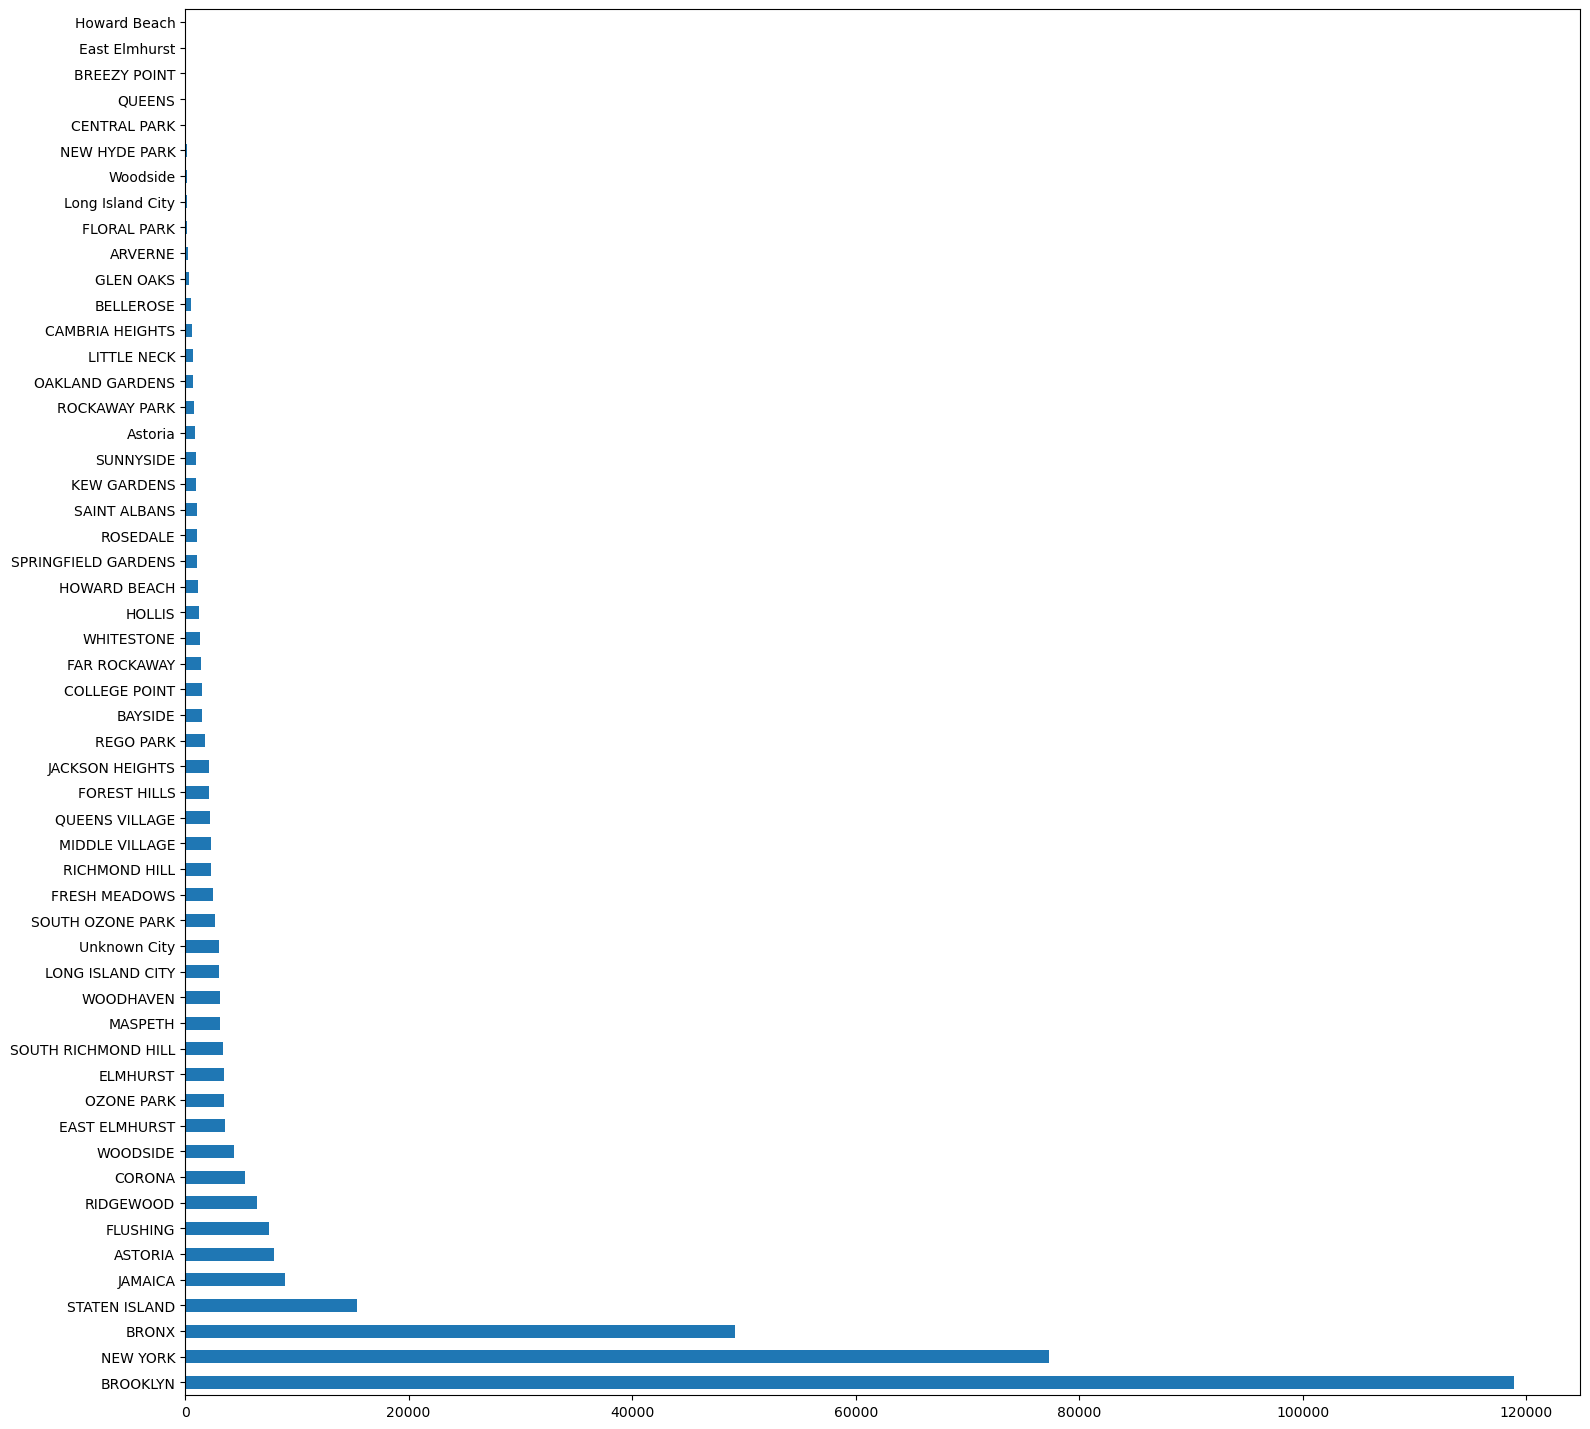

In [25]:


df["City"].value_counts().plot(kind="barh", figsize=(18,18))

<Axes: >

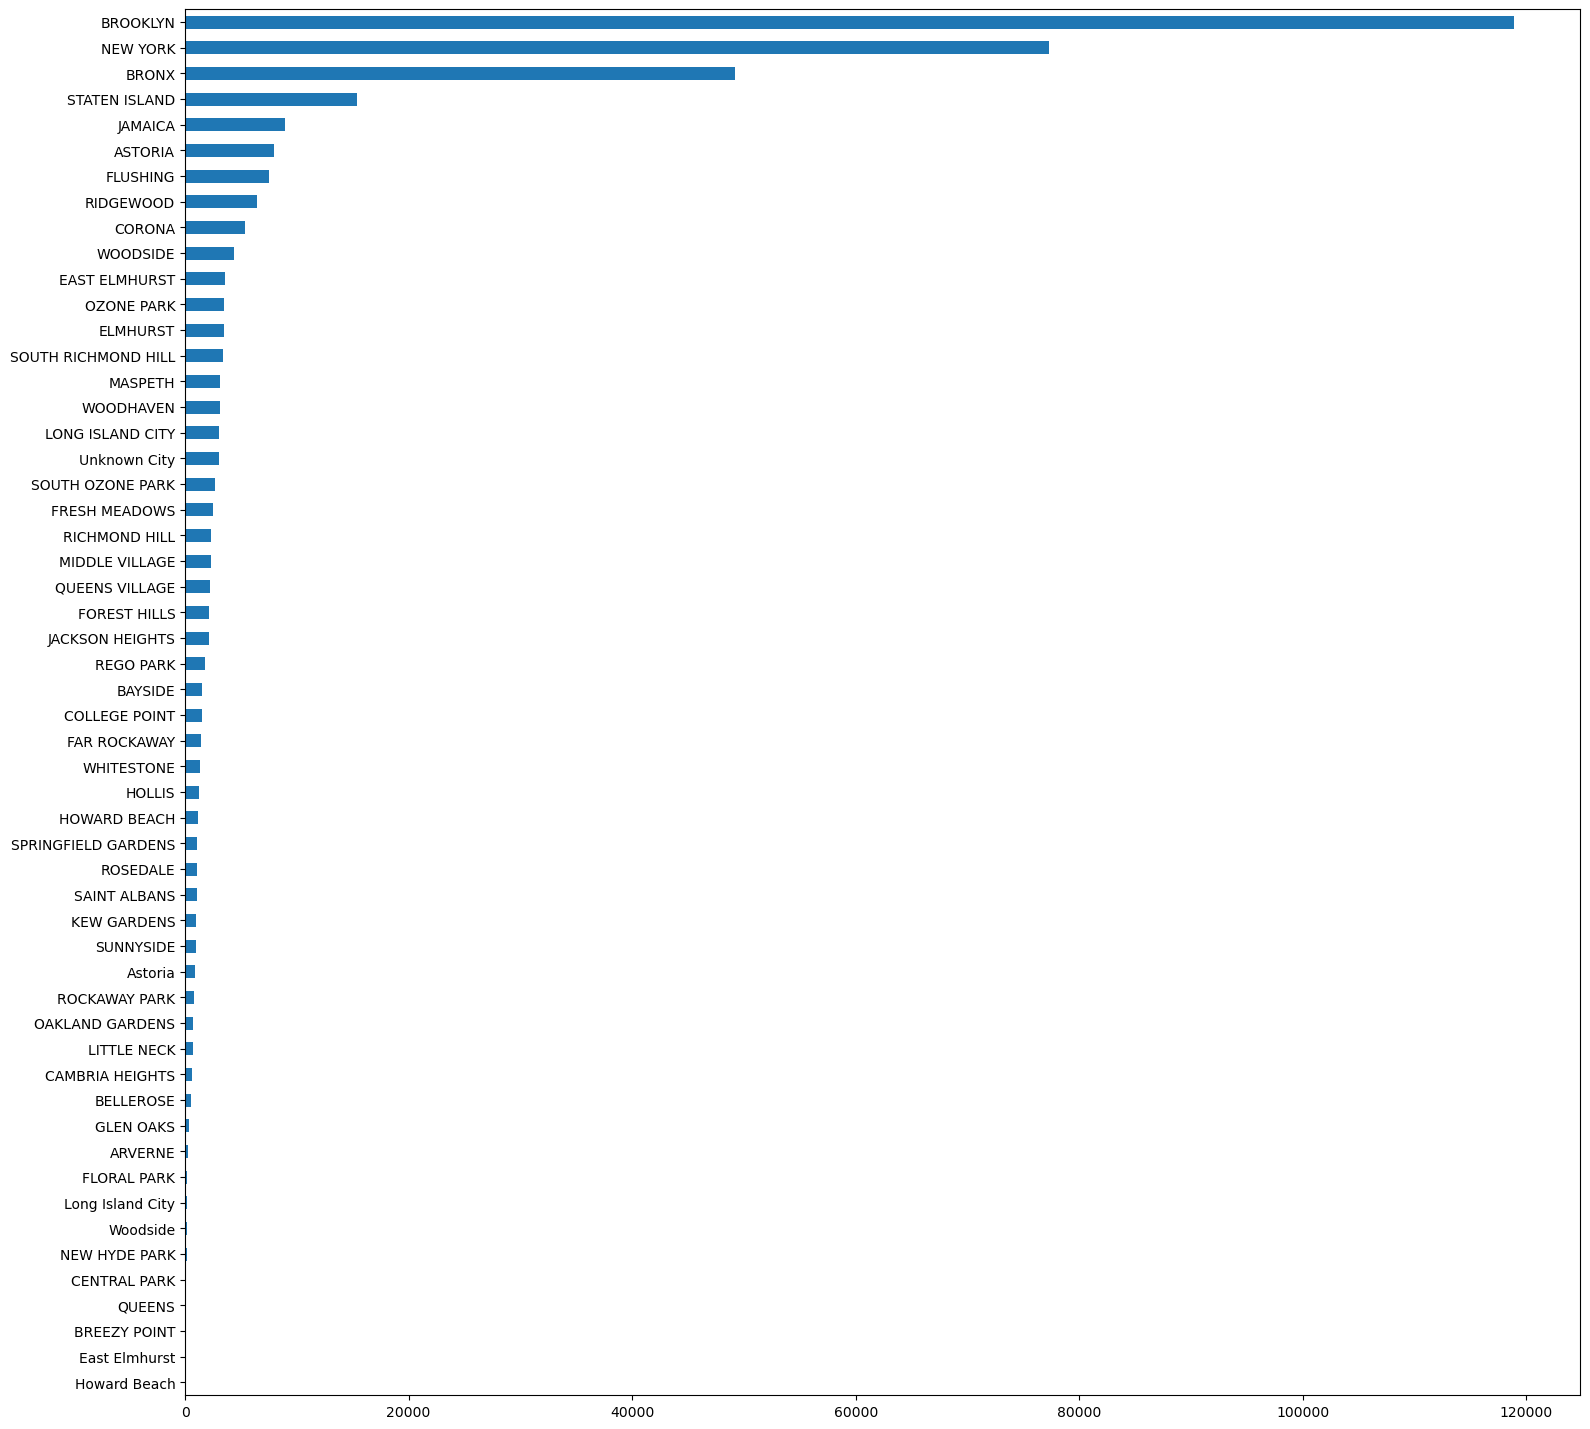

In [26]:
df["City"].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(18,18))

### 2.3.7Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [27]:
df.City.value_counts().head(10)

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
ASTORIA            7991
FLUSHING           7487
RIDGEWOOD          6392
CORONA             5383
WOODSIDE           4357
Name: City, dtype: int64

In [28]:
df_Brooklyn = df[df.City=="BROOKLYN"]

In [29]:
df_NewYork = df[df.City=="NEW YORK"]

In [30]:
df_Brooklyn.shape

(118862, 54)

In [31]:
df_NewYork.shape

(77312, 54)

<Axes: xlabel='Latitude', ylabel='Longitude'>

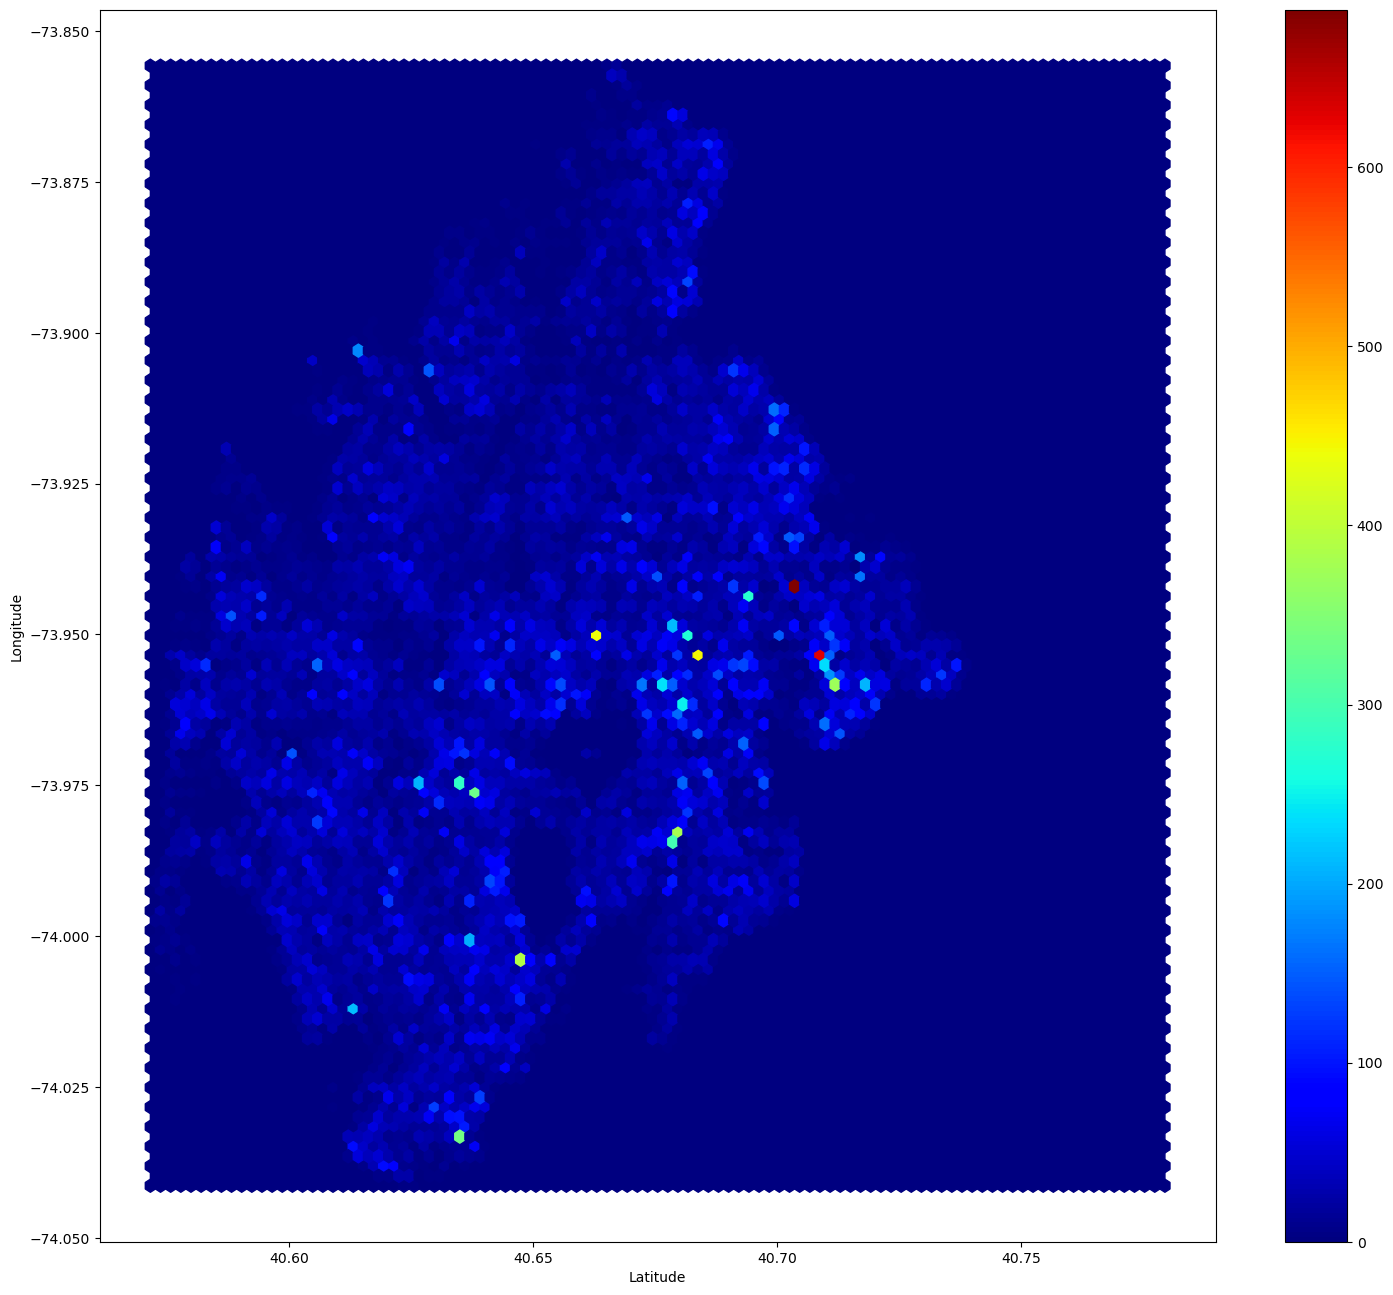

In [32]:
df_Brooklyn.plot(kind="hexbin", x="Latitude", y="Longitude", figsize=(18,16), colormap="jet")

## Find major types of complaints:
### 3.1Plot a bar graph to show the types of complaints

In [33]:
df["Complaint Type"].value_counts().head(5)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Name: Complaint Type, dtype: int64

<Axes: >

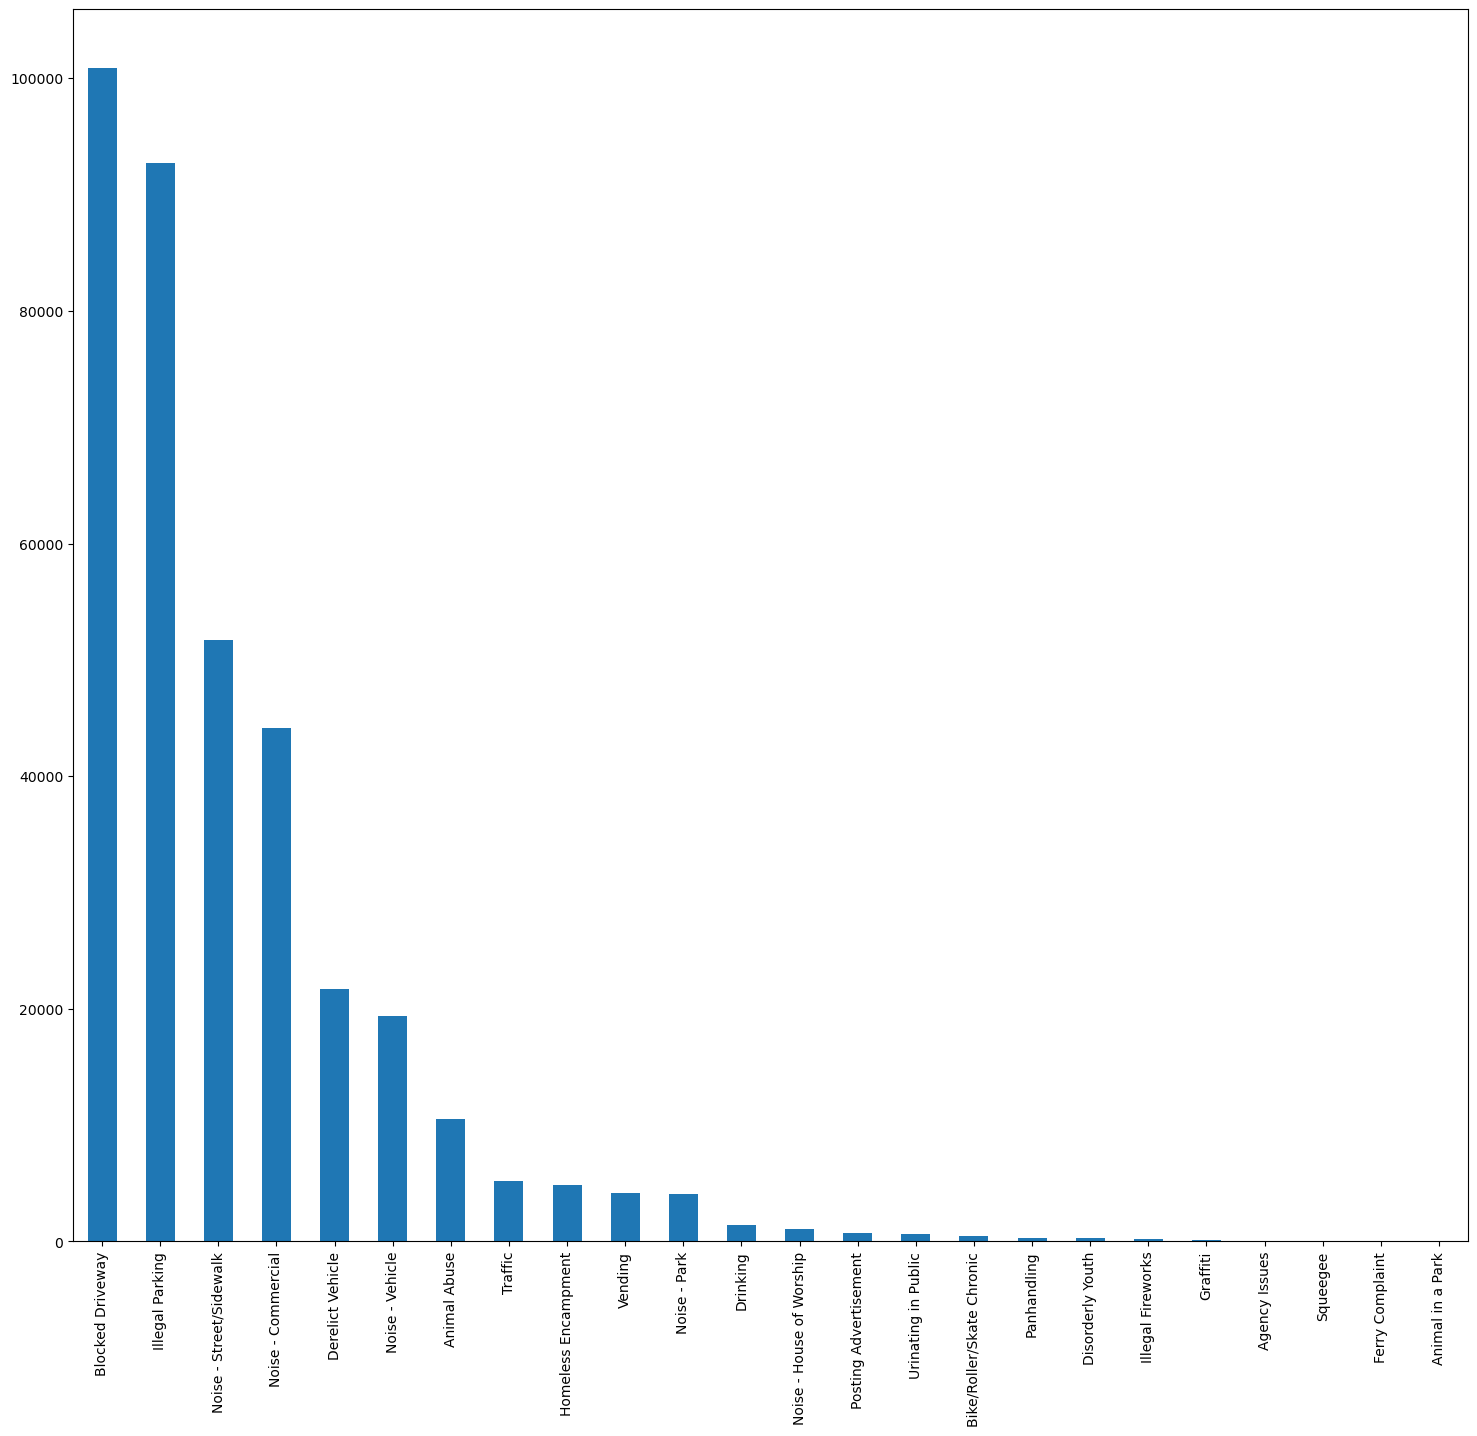

In [34]:
df["Complaint Type"].value_counts().plot(kind="bar", figsize=(18,16))

###  3.2Check the frequency of various types of complaints for New York City

In [35]:
df[df.City=="NEW YORK"]['Complaint Type'].value_counts()

Noise - Street/Sidewalk      22252
Noise - Commercial           18692
Illegal Parking              14553
Noise - Vehicle               6295
Homeless Encampment           3060
Blocked Driveway              2707
Vending                       2639
Animal Abuse                  1941
Traffic                       1770
Noise - Park                  1244
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

### 3.3Find the top 10 complaint types

In [36]:
df["Complaint Type"].value_counts().head(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

<Axes: >

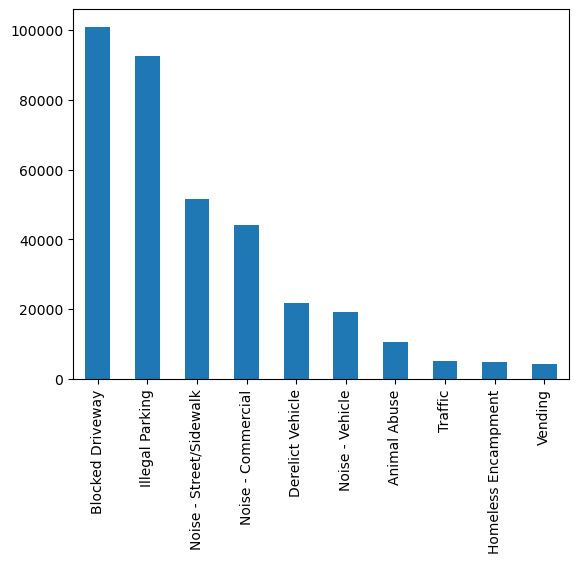

In [37]:
df["Complaint Type"].value_counts().head(10).plot(kind="bar")

### 3.4Display the various types of complaints in each city

In [38]:
pd.crosstab(df["City"], df["Complaint Type"]).head(5)

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,0,1,4,0,62,2,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3436,426,5,43,0,4,32,4,1340,1653,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,0,159,14,0,0,0,0,0,0,277,311,0,0,145,0,0,0,0,0,0,0
BAYSIDE,0,53,0,0,514,231,2,1,0,3,2,0,638,47,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,0,1,1,132,38,1,1,13,11,1,1,0,9,1,0


### Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [39]:
"""df_new = pd.DataFrame() for i in df['City'].unique(): df_new[i] = df.loc[df['City'] == i]['Complaint Type'].value_counts()
df_new = df.pivot_table(index='Complaint Type', columns='City)
"""
df_new= pd.crosstab(df["Complaint Type"], df["City"])

In [40]:
df_new.head(5)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,35,104,85,59,0,111,7,191,78,66,5,39,51,0,50,317,26,21,40,0,56,36,1,1941,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,12,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,0,0,1,2,0,0,0,3,6,0,0,0,1,0,2,3,0,0,3,0,1,1,0,254,2,1,0,0,0,0,3,0,2,0,1,1,0,10,2,5,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17063,36447,177,0,597,3597,1925,1992,0,383,33,3641,873,682,48,442,215,1,703,3621,429,174,1052,55,1000,663,76,2707,177,1681,3,772,780,1100,2162,80,270,318,1202,1946,330,2845,278,333,279,1364,2038,27


### 4. Visualize the major types of complaints in each city


In [41]:
pd.set_option('display.max_rows', None)
df.groupby("City")["Complaint Type"].value_counts().head(10)

City     Complaint Type          
ARVERNE  Illegal Parking             62
         Blocked Driveway            50
         Animal Abuse                46
         Derelict Vehicle            32
         Noise - Street/Sidewalk     29
         Noise - House of Worship    14
         Noise - Vehicle             10
         Homeless Encampment          4
         Disorderly Youth             2
         Noise - Commercial           2
Name: Complaint Type, dtype: int64

###  4.1Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

<Axes: ylabel='City'>

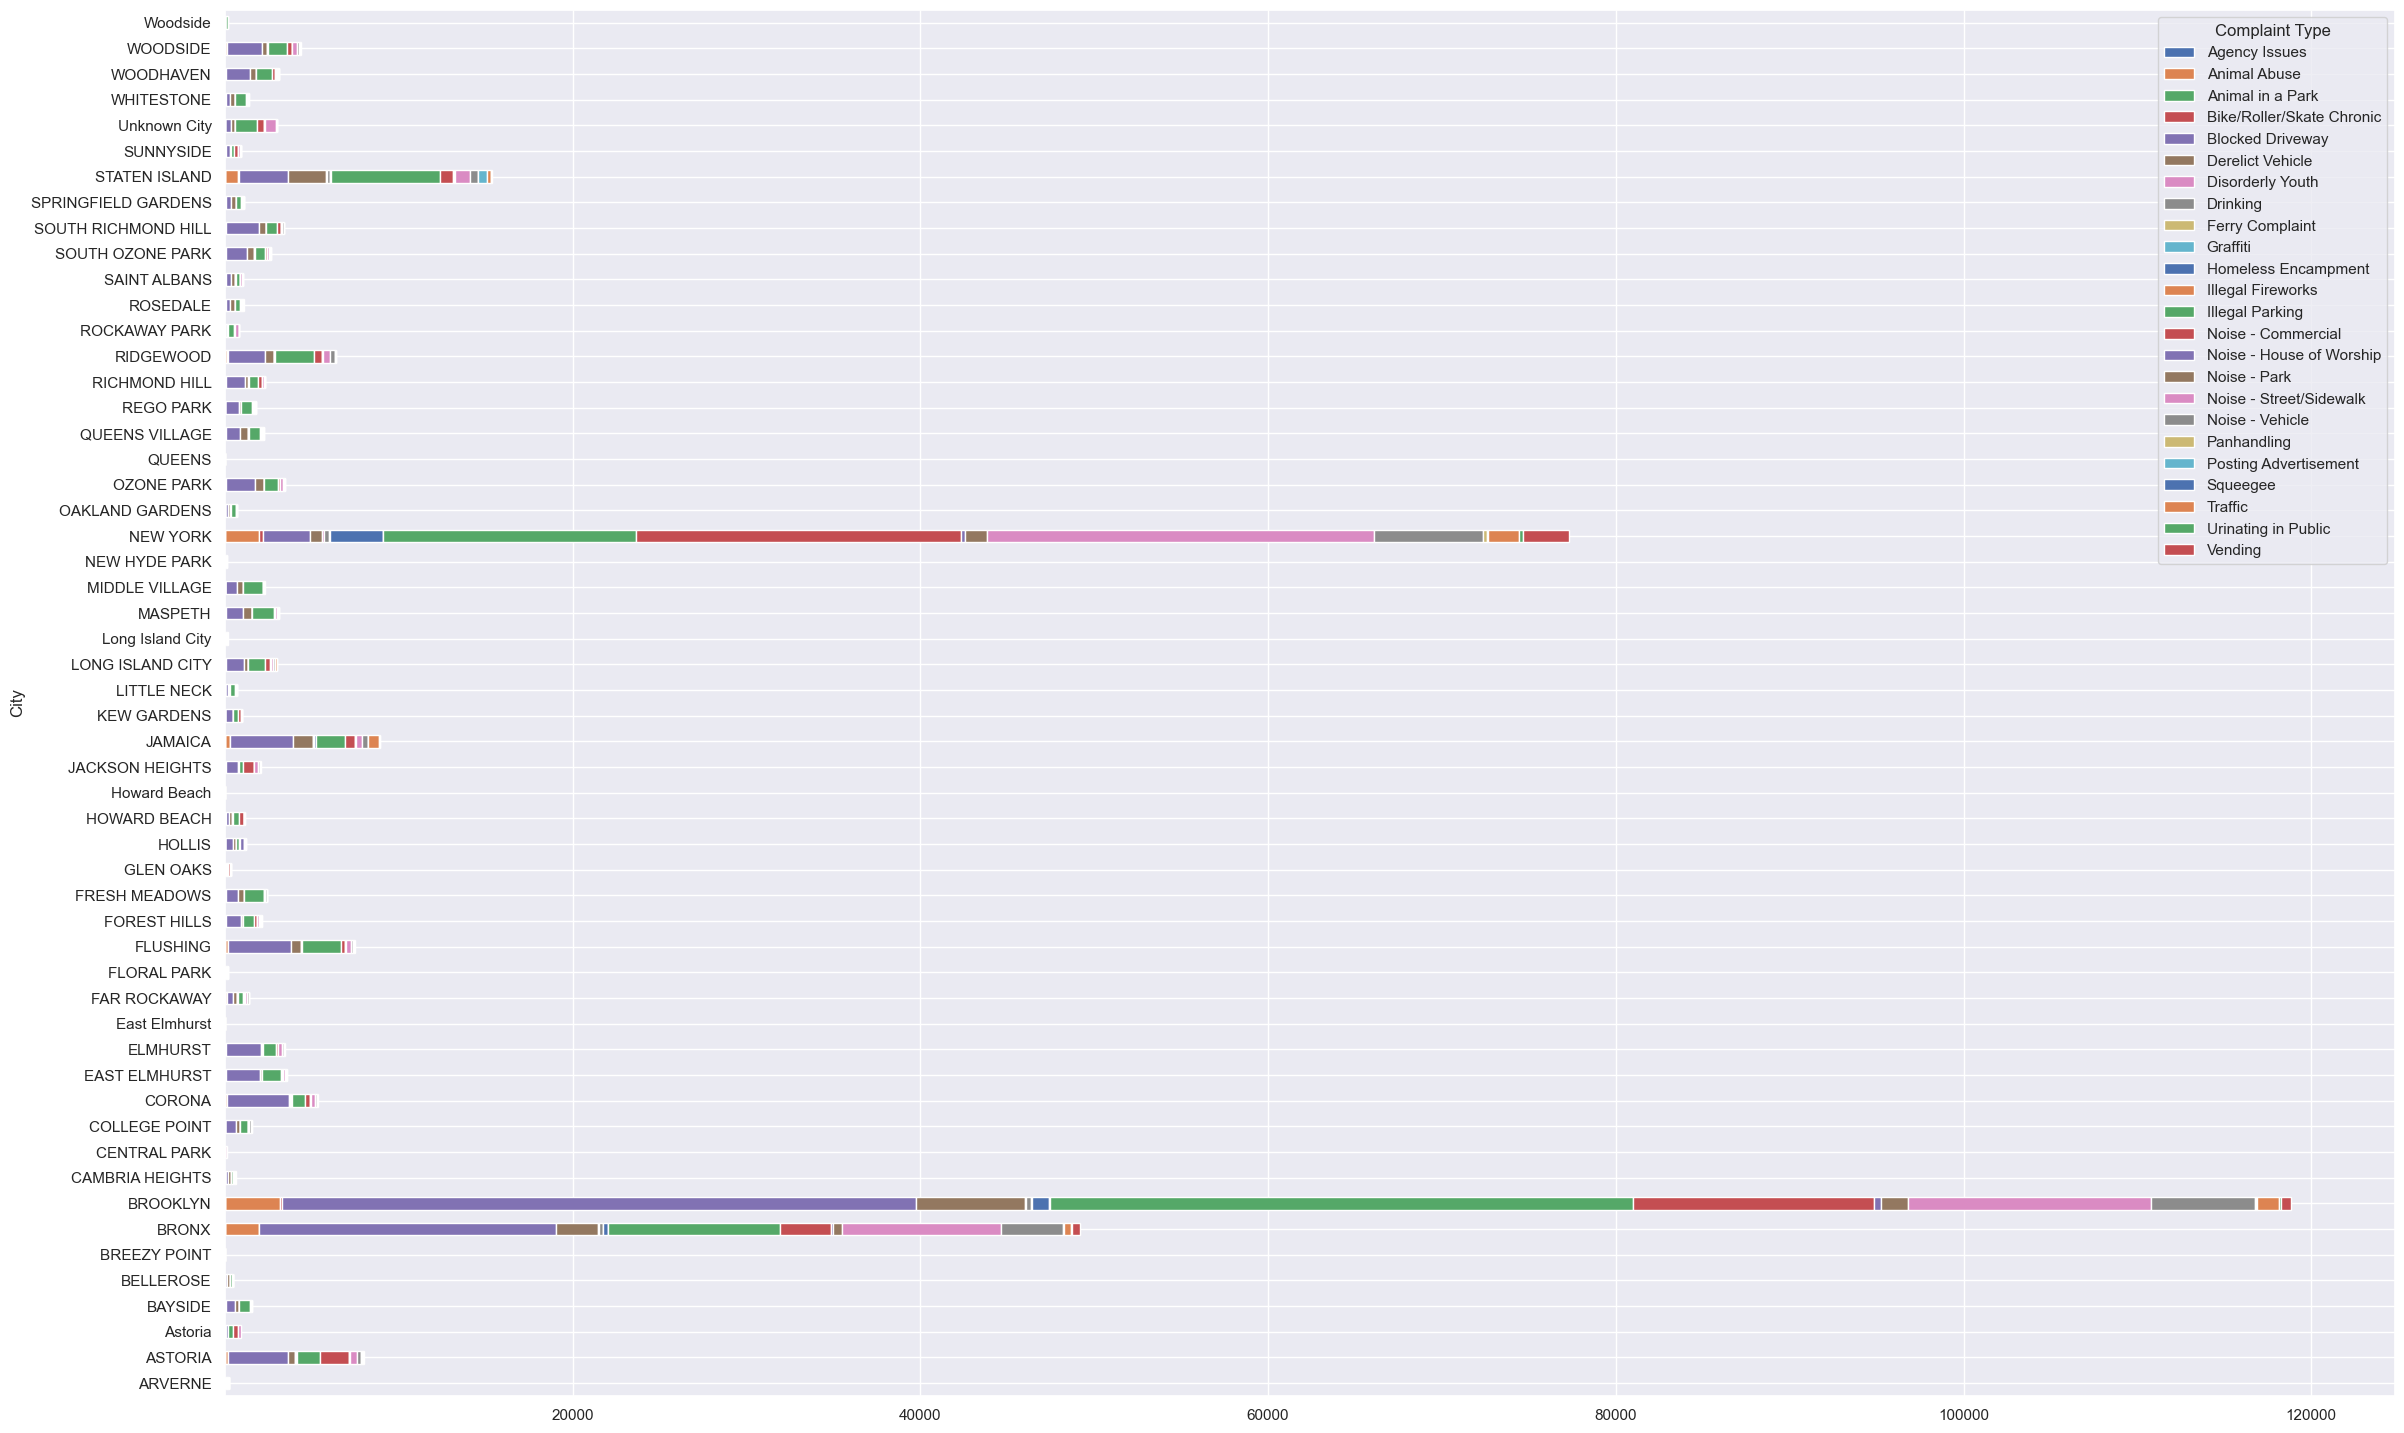

In [42]:
sns.set()
df_new.T.plot(kind="barh", stacked= True, figsize= (28,18))

### 4.2Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [43]:
df.groupby(["City", "Complaint Type"]).Request_Closing_Time.mean().head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 8399.195652
         Blocked Driveway             8318.840000
         Derelict Vehicle            11394.000000
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5508.000000
         Homeless Encampment          6541.250000
         Illegal Parking              8406.080645
         Noise - Commercial           8234.000000
         Noise - House of Worship     6653.428571
Name: Request_Closing_Time, dtype: float64

In [44]:
df.groupby(["Complaint Type"]).Request_Closing_Time.mean()

Complaint Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Ferry Complaint                       NaN
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending            

### 5.See whether the average response time across different complaint types is similar (overall)
### 5.1Visualize the average ofRequest_Closing_Time

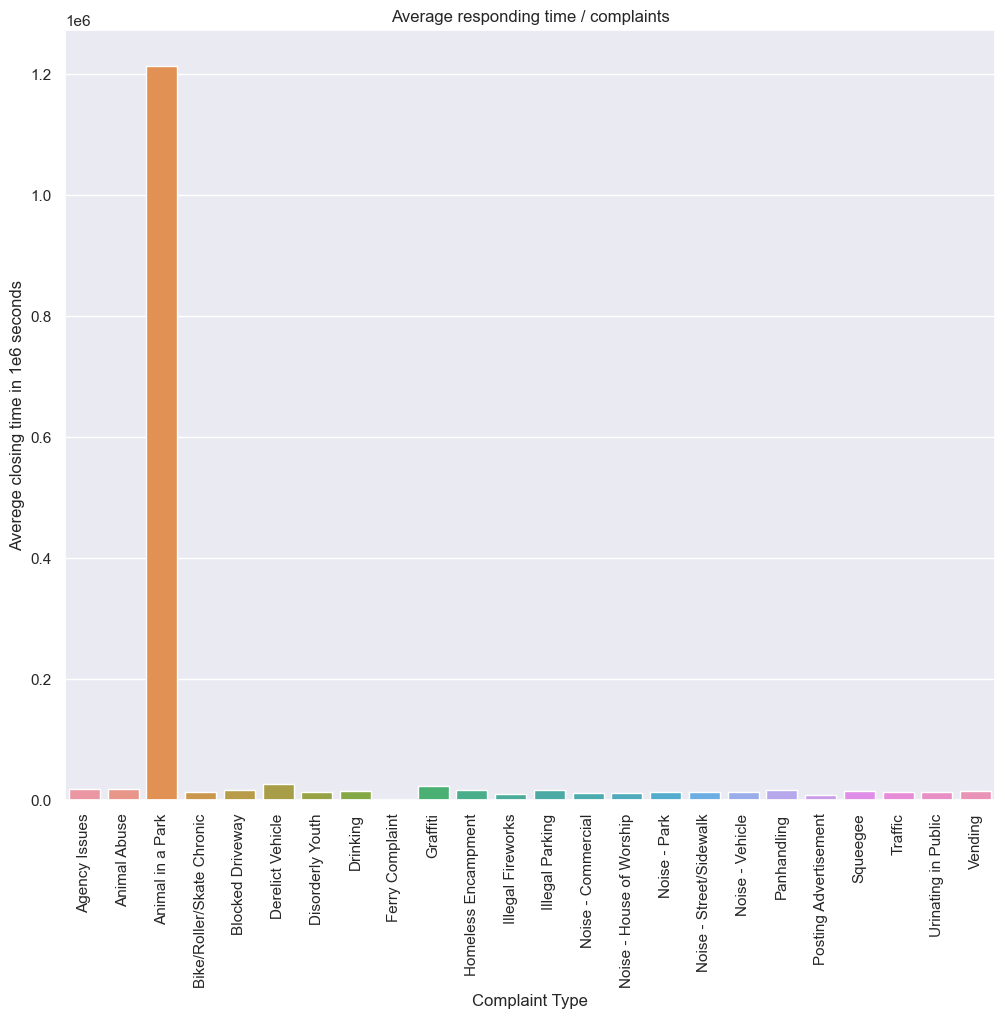

In [45]:
average_response_time= df.groupby(["Complaint Type"]).Request_Closing_Time.mean()
plt.figure(figsize=(12,10))
sns.barplot(x=average_response_time.index, y=average_response_time.values)
plt.xticks(rotation=90)
plt.ylabel("Averege closing time in 1e6 seconds")
plt.title("Average responding time / complaints")
plt.show()

### 5.1 Average of Request closing time

In [46]:
df.groupby(["Complaint Type"]).Request_Closing_Time.mean().head(5)

Complaint Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Name: Request_Closing_Time, dtype: float64

### 6. Identify the significant variables by performing statistical analysis using p-values. All The necessary steps:


In [47]:
df_num_var= df.select_dtypes(include="number")
df_num_var.columns

Index(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Garage Lot Name', 'Latitude', 'Longitude', 'Request_Closing_Time'],
      dtype='object')

In [48]:
df_cat_var= df.select_dtypes(exclude="number")
df_cat_var.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Location'],
      dtype='object')

In [49]:
df_num_var.isnull().sum()

Unique Key                           0
Incident Zip                      2998
X Coordinate (State Plane)        4030
Y Coordinate (State Plane)        4030
School or Citywide Complaint    364558
Vehicle Type                    364558
Taxi Company Borough            364558
Taxi Pick Up Location           364558
Garage Lot Name                 364558
Latitude                          4030
Longitude                         4030
Request_Closing_Time              2381
dtype: int64

In [50]:
df_num_var.shape

(364558, 12)

### Dropping all Optional Variables

In [51]:
df_num_var= df_num_var.drop(['School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Garage Lot Name'], axis=1)

In [52]:
df_num_var.isnull().sum()

Unique Key                       0
Incident Zip                  2998
X Coordinate (State Plane)    4030
Y Coordinate (State Plane)    4030
Latitude                      4030
Longitude                     4030
Request_Closing_Time          2381
dtype: int64

In [53]:
df_num_var[["Incident Zip","X Coordinate (State Plane)", "Y Coordinate (State Plane)", "Latitude", 
           "Longitude", "Request_Closing_Time"]].nunique()

Incident Zip                     201
X Coordinate (State Plane)     68410
Y Coordinate (State Plane)     79924
Latitude                      146740
Longitude                     146473
Request_Closing_Time           56190
dtype: int64

In [54]:
df_cat_var["Created Date"].head(10)

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
5   2015-12-31 23:56:30
6   2015-12-31 23:55:32
7   2015-12-31 23:54:05
8   2015-12-31 23:53:58
9   2015-12-31 23:53:58
Name: Created Date, dtype: datetime64[ns]

In [55]:
df_cat_var.isnull().sum()[df_cat_var.isnull().sum()>0]

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
School Region                          1
School Code                            1
School Zip                             1
Bridge Highway Name               364261
Bridge Highway Direction          364261
Road Ramp                         364296
Bridge Highway Segment            364296
Ferry Direction                   364557
Ferry Terminal Name               364556
Location                            4030
dtype: int64

In [56]:
df_cat_var.shape

(364558, 42)

In [57]:
df_cat_var = df_cat_var.drop(["Bridge Highway Name","Bridge Highway Direction", "Road Ramp", "Bridge Highway Segment", 
                             "Ferry Direction", "Ferry Terminal Name", "Intersection Street 1", "Intersection Street 2", 
                             "Landmark"], axis=1)

In [58]:
df_cat_var.shape

(364558, 33)

In [59]:
df_cat_var.isnull().sum()[df_cat_var.isnull().sum()>0]

Closed Date                        2381
Descriptor                         6501
Location Type                       133
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
Facility Type                      2389
Due Date                              3
Resolution Action Updated Date     2402
School Region                         1
School Code                           1
School Zip                            1
Location                           4030
dtype: int64

In [60]:
df_cat_var.Descriptor= df_cat_var.Descriptor.fillna(np.nan)

In [158]:
max_values=10
missing_vars = df_cat_var.isnull().sum()[df_cat_var.isnull().sum() > 0].index.tolist()
for var in missing_vars:
    print(f"Variable: {var}")
    print(df_cat_var[var].value_counts(dropna=False).head(max_values))
    print()

Variable: Incident Address
1.0    78855
NaN    51699
2.0    42920
3.0    27609
4.0    19476
5.0    14695
6.0    11304
7.0    10052
8.0     7784
9.0     6345
Name: Incident Address, dtype: int64

Variable: School Region
Unspecified    364557
NaN                 1
Name: School Region, dtype: int64

Variable: School Code
Unspecified    364557
NaN                 1
Name: School Code, dtype: int64

Variable: School Zip
Unspecified    364557
NaN                 1
Name: School Zip, dtype: int64



In [62]:
df_cat_var.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

In [63]:
df_cat_var.shape

(364558, 33)

In [64]:
df_cat_var["Location Type"]= df_cat_var["Location Type"].fillna({"NaN":"Street/Sidewalk"})

In [65]:
df_cat_var.isnull().sum()[df_cat_var.isnull().sum()>0]

Closed Date                        2381
Descriptor                         6501
Location Type                       133
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
Facility Type                      2389
Due Date                              3
Resolution Action Updated Date     2402
School Region                         1
School Code                           1
School Zip                            1
Location                           4030
dtype: int64

In [66]:
df_num_var["Incident Zip"].mean()

10858.496658922448

In [67]:
df_num_var["Incident Zip"].median()

11209.0

In [68]:
df_num_var["Incident Zip"].mode()

0    11385.0
Name: Incident Zip, dtype: float64

In [69]:
df_num_var["Incident Zip"].value_counts().head(5)

11385.0    6396
11368.0    5384
11234.0    5199
11211.0    4854
11377.0    4525
Name: Incident Zip, dtype: int64

In [70]:
df_num_var["X Coordinate (State Plane)"].mode()

0    1021327.0
Name: X Coordinate (State Plane), dtype: float64

In [71]:
df_num_var["X Coordinate (State Plane)"].median()

1003470.0

In [72]:
df_num_var["X Coordinate (State Plane)"].min()

913357.0

In [150]:
"""missing_vars_num = df_num_var.isnull().sum()[df_num_var.isnull().sum() > 0].index.tolist()
for var in missing_vars_num:
    print(f"Variable: {var}")
    print(df_num_var[var].value_counts(dropna=False))
    print()"""


'missing_vars_num = df_num_var.isnull().sum()[df_num_var.isnull().sum() > 0].index.tolist()\nfor var in missing_vars_num:\n    print(f"Variable: {var}")\n    print(df_num_var[var].value_counts(dropna=False))\n    print()'

In [74]:
df_num_var["Incident Zip"]= df_num_var["Incident Zip"].fillna(np.nan)

In [76]:
# List of Optional Vehicles
""""""
df[['School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name']].head(5)

,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name
0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_cat_var.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location'],
      dtype='object')

In [78]:
df_cat_var = df_cat_var.drop(['School Name', 'School Number',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Not Found'], axis=1)

In [160]:
df_cat_var.head(4)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,0,2,16,24,14,1.0,0,33,0,1,5,2,Unspecified,Unspecified,Unspecified
1,0,2,4,28,14,36.0,0,1,0,1,9,3,Unspecified,Unspecified,Unspecified
2,0,2,4,28,14,1.0,0,6,0,1,5,0,Unspecified,Unspecified,Unspecified
3,0,2,12,11,14,1.0,0,6,0,1,8,0,Unspecified,Unspecified,Unspecified


In [80]:
df_num_var.head(2)

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time
0,32310363,10034.0,1005409.0,254678.0,40.865682,-73.923501,3330.0
1,32309934,11105.0,1007766.0,221986.0,40.775945,-73.915094,5233.0


In [81]:
df_num_var.columns

Index(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [82]:
df.Agency.value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [83]:
df["Agency Name"].value_counts()

New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: Agency Name, dtype: int64

In [84]:
df["Status"].value_counts()

Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

In [85]:
df["Community Board"].nunique()

75

In [86]:
df["Park Borough"].value_counts()

BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: Park Borough, dtype: int64

In [87]:
df[["Borough","Park Borough"]].head(5)

,Borough,Park Borough
0,MANHATTAN,MANHATTAN
1,QUEENS,QUEENS
2,BRONX,BRONX
3,BRONX,BRONX
4,QUEENS,QUEENS


In [88]:
df[["Community Board","Borough"]].head(25)

,Community Board,Borough
0,12 MANHATTAN,MANHATTAN
1,01 QUEENS,QUEENS
2,07 BRONX,BRONX
3,10 BRONX,BRONX
4,04 QUEENS,QUEENS
5,07 BROOKLYN,BROOKLYN
6,12 MANHATTAN,MANHATTAN
7,03 BRONX,BRONX
8,09 QUEENS,QUEENS
9,11 BROOKLYN,BROOKLYN


In [89]:
df_cat_var = df_cat_var.drop(['Park Facility Name', 'Park Borough',
       'Location'], axis=1)

In [90]:
df_cat_var["Facility Type"].value_counts()

Precinct    362169
Name: Facility Type, dtype: int64

In [91]:
df_cat_var["Due Date"].value_counts().head(10)

06/04/2015 06:16:23 AM    3
08/09/2015 06:16:46 AM    3
03/02/2015 06:27:37 AM    3
08/16/2015 06:49:03 AM    3
12/24/2015 02:33:50 AM    3
05/10/2015 05:32:57 AM    3
08/08/2015 01:07:42 AM    3
10/27/2015 04:33:33 PM    3
07/16/2015 03:21:55 PM    3
09/11/2015 05:19:51 AM    3
Name: Due Date, dtype: int64

In [92]:
df[['Park Facility Name','Park Borough']].value_counts()

Park Facility Name               Park Borough 
Unspecified                      BROOKLYN         118864
                                 QUEENS           100766
                                 MANHATTAN         77462
                                 BRONX             49169
                                 STATEN ISLAND     15339
                                 Unspecified        2957
Alley Pond Park - Nature Center  Unspecified           1
dtype: int64

In [93]:
df_cat_var.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'School Region', 'School Code', 'School Zip'],
      dtype='object')

In [94]:
df.Borough.value_counts()

BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: Borough, dtype: int64

In [95]:
df_num_var.columns

Index(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [96]:
df_num_var.isnull().sum()[df_num_var.isnull().sum()>0]

Incident Zip                  2998
X Coordinate (State Plane)    4030
Y Coordinate (State Plane)    4030
Latitude                      4030
Longitude                     4030
Request_Closing_Time          2381
dtype: int64

### Dropping Incident Zip, X & Y coordinate as Longitude and Latitude gives te same information

In [97]:
df_num_var= df_num_var.drop(['Unique Key', 'Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)'], axis=1)

### Using KNNI imputer to treat missing values

In [98]:
from sklearn.impute import KNNImputer
import pandas as pd

k_neighbors = 5
data_array = df_num_var[['Longitude', 'Latitude']].values
imputer = KNNImputer(n_neighbors=k_neighbors)
imputed_data = imputer.fit_transform(data_array)
df_num_var[['Longitude', 'Latitude']] = pd.DataFrame(imputed_data, columns=['Longitude', 'Latitude'])



In [99]:
df_num_var["Request_Closing_Time"].mean()

15113.299632500131

In [100]:
df_num_var["Request_Closing_Time"].median()

9616.0

In [101]:
df_num_var["Request_Closing_Time"]=df_num_var["Request_Closing_Time"].fillna(df_num_var["Request_Closing_Time"].median())

In [102]:
df_num_var["Request_Closing_Time"].isnull().sum()

0

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\3613829130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num_var["Request_Closing_Time"])


<Axes: xlabel='Request_Closing_Time', ylabel='Density'>

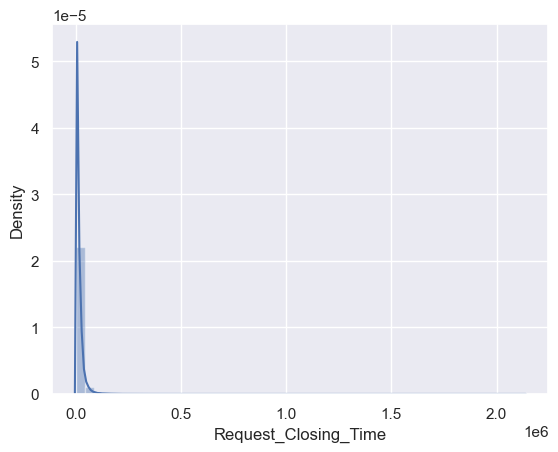

In [103]:
sns.distplot(df_num_var["Request_Closing_Time"])

In [104]:
import statsmodels.api as sm
X=df_num_var[['Latitude', 'Longitude']]
y=df_num_var[["Request_Closing_Time"]]
X = sm.add_constant(X)
model =sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     2055.
Date:                  Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                          08:52:34   Log-Likelihood:            -4.1441e+06
No. Observations:                364558   AIC:                         8.288e+06
Df Residuals:                    364555   BIC:                         8.288e+06
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.338e+06   4.55e+04     51.402      0.000    2.25e+06    2.43e+06
Latitude   -3666.9309    458.683     -7.994      0.000   -4565.936   -2767.926
Longitude    2.94e+04    474.285     61.983      0.000    2.85e+04    3.03e+04
==============================================================================
Omnibus:                   749769.234   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      18955599318.224
Skew:                          16.553   Prob(JB):                         0.00
Kurtosis:                    1119.607   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking if the value for Longitute and Latitute is similar to X Coordinate and Y Coordinate

<Axes: xlabel='X Coordinate (State Plane)', ylabel='Y Coordinate (State Plane)'>

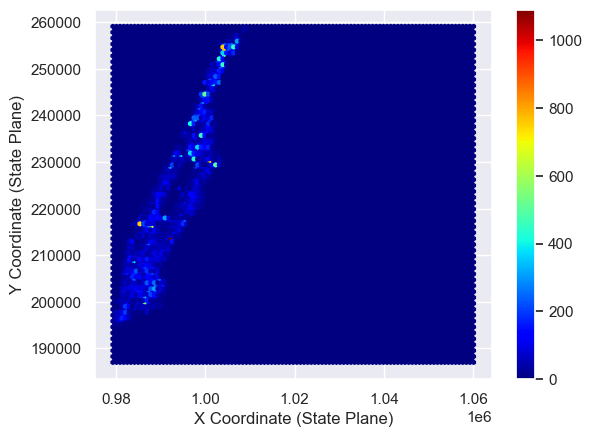

In [154]:
df_NewYork.plot(kind="hexbin", x="X Coordinate (State Plane)", y="Y Coordinate (State Plane)", colormap="jet")

<Axes: xlabel='Longitude', ylabel='Latitude'>

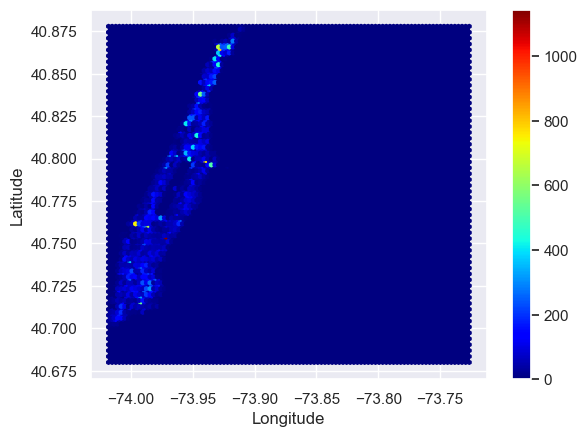

In [153]:
df_NewYork.plot(kind="hexbin", x="Longitude", y="Latitude",  colormap="jet")

In [159]:

df.sort_values("Y Coordinate (State Plane)", ascending=True).head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
328215,30016667,2015-02-23 14:07:15,2015-02-23 14:50:06,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,10307.0,BILLOP AVENUE,BILLOP AVENUE,MAIN STREET,SWINNERTON STREET,NaN,NaN,BLOCKFACE,STATEN ISLAND,NaN,Precinct,Closed,02/23/2015 10:07:15 PM,The Police Department reviewed your complaint ...,02/23/2015 02:50:06 PM,03 STATEN ISLAND,STATEN ISLAND,916410.0,121185.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499040,-74.243927,"(40.49904035820963, -74.24392674874807)"
329818,30010049,2015-02-21 09:29:24,2015-02-21 10:13:41,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10307.0,NaN,NaN,NaN,NaN,BILLOP AVENUE,MAIN STREET,INTERSECTION,STATEN ISLAND,NaN,Precinct,Closed,02/21/2015 05:29:24 PM,The Police Department responded to the complai...,02/21/2015 10:13:41 AM,03 STATEN ISLAND,STATEN ISLAND,916533.0,121219.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.243485,"(40.49913462101514, -74.24348482977875)"
240695,30704700,2015-05-26 22:56:24,2015-05-26 23:08:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10307.0,NaN,NaN,NaN,NaN,BILLOP AVENUE,MAIN STREET,INTERSECTION,STATEN ISLAND,NaN,Precinct,Closed,05/27/2015 06:56:24 AM,The Police Department responded to the complai...,05/26/2015 11:08:14 PM,03 STATEN ISLAND,STATEN ISLAND,916533.0,121219.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.243485,"(40.49913462101514, -74.24348482977875)"
326321,30042525,2015-02-25 22:10:46,2015-02-25 23:17:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10307.0,NaN,NaN,NaN,NaN,BILLOP AVENUE,MAIN STREET,INTERSECTION,STATEN ISLAND,NaN,Precinct,Closed,02/26/2015 06:10:46 AM,The Police Department responded to the complai...,02/25/2015 11:17:00 PM,03 STATEN ISLAND,STATEN ISLAND,916533.0,121219.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.243485,"(40.49913462101514, -74.24348482977875)"
302329,30267511,2015-03-26 23:31:30,2015-03-26 23:45:07,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10307.0,NaN,NaN,NaN,NaN,BILLOP AVENUE,MAIN STREET,INTERSECTION,STATEN ISLAND,NaN,Precinct,Closed,03/27/2015 07:31:30 AM,The Police Department responded to the complai...,03/26/2015 11:45:07 PM,03 STATEN ISLAND,STATEN ISLAND,916533.0,121219.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499135,-74.243485,"(40.49913

In [109]:
df_cat_var.head(5)


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,School Region,School Code,School Zip
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,Unspecified,Unspecified,Unspecified
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,Unspecified,Unspecified,Unspecified
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,Unspecified,Unspecified,Unspecified
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,Unspecified,Unspecified,Unspecified
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,Unspecified,Unspecified,Unspecified


In [110]:
df_cat_var= df_cat_var.drop(["Created Date", "Closed Date","Street Name", "Cross Street 1", 
                            "Cross Street 2", "Due Date", "Resolution Action Updated Date", "Community Board"],axis=1)

In [111]:
df_cat_var.head(2)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,ADDRESS,NEW YORK,Precinct,Closed,The Police Department responded and upon arriv...,MANHATTAN,Unspecified,Unspecified,Unspecified
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,ADDRESS,ASTORIA,Precinct,Closed,The Police Department responded to the complai...,QUEENS,Unspecified,Unspecified,Unspecified


In [112]:
df_cat_var["Incident Address"]=df_cat_var["Incident Address"].map(df_cat_var["Incident Address"].value_counts())

In [162]:
df_cat_var.head(5)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,0,2,16,24,14,1.0,0,33,0,1,5,2,Unspecified,Unspecified,Unspecified
1,0,2,4,28,14,36.0,0,1,0,1,9,3,Unspecified,Unspecified,Unspecified
2,0,2,4,28,14,1.0,0,6,0,1,5,0,Unspecified,Unspecified,Unspecified
3,0,2,12,11,14,1.0,0,6,0,1,8,0,Unspecified,Unspecified,Unspecified
4,0,2,12,4,14,6.0,0,13,0,1,5,3,Unspecified,Unspecified,Unspecified


### Performing Label encoder for categorical Varaibles

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode= ['Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Address Type', 'City',
       'Facility Type', 'Status', 'Resolution Description', 'Borough']
encoder = LabelEncoder()

for column in columns_to_encode:
    df_cat_var[column] = encoder.fit_transform(df_cat_var[column])
    
print(le)

LabelEncoder()


In [163]:
df_cat_var.head(5)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,0,2,16,24,14,1.0,0,33,0,1,5,2,Unspecified,Unspecified,Unspecified
1,0,2,4,28,14,36.0,0,1,0,1,9,3,Unspecified,Unspecified,Unspecified
2,0,2,4,28,14,1.0,0,6,0,1,5,0,Unspecified,Unspecified,Unspecified
3,0,2,12,11,14,1.0,0,6,0,1,8,0,Unspecified,Unspecified,Unspecified
4,0,2,12,4,14,6.0,0,13,0,1,5,3,Unspecified,Unspecified,Unspecified


In [116]:
df_num_var.head(2)

,Latitude,Longitude,Request_Closing_Time
0,40.865682,-73.923501,3330.0
1,40.775945,-73.915094,5233.0


### Joining two database

In [117]:
df_new = pd.concat([df_num_var, df_cat_var], axis=1)

In [118]:
df_new.head(2)

,Latitude,Longitude,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,40.865682,-73.923501,3330.0,0,2,16,24,14,1.0,0,33,0,1,5,2,Unspecified,Unspecified,Unspecified
1,40.775945,-73.915094,5233.0,0,2,4,28,14,36.0,0,1,0,1,9,3,Unspecified,Unspecified,Unspecified


In [119]:
df_new.isnull().sum()

Latitude                      0
Longitude                     0
Request_Closing_Time          0
Agency                        0
Agency Name                   0
Complaint Type                0
Descriptor                    0
Location Type                 0
Incident Address          51699
Address Type                  0
City                          0
Facility Type                 0
Status                        0
Resolution Description        0
Borough                       0
School Region                 1
School Code                   1
School Zip                    1
dtype: int64

In [120]:
# Since we have longitude and latitute, we can retrive the zipcode value using map, meaning it alsó give us the street address, so
# incedent address can be removed from here.

df_new = df_new.drop(["Incident Address"], axis=1)

In [121]:
df_new.isnull().sum()

Latitude                  0
Longitude                 0
Request_Closing_Time      0
Agency                    0
Agency Name               0
Complaint Type            0
Descriptor                0
Location Type             0
Address Type              0
City                      0
Facility Type             0
Status                    0
Resolution Description    0
Borough                   0
School Region             1
School Code               1
School Zip                1
dtype: int64

In [122]:
# Now performing p value analysis to find the significan variables.

df_new.head()

,Latitude,Longitude,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,Resolution Description,Borough,School Region,School Code,School Zip
0,40.865682,-73.923501,3330.0,0,2,16,24,14,0,33,0,1,5,2,Unspecified,Unspecified,Unspecified
1,40.775945,-73.915094,5233.0,0,2,4,28,14,0,1,0,1,9,3,Unspecified,Unspecified,Unspecified
2,40.870325,-73.888525,17494.0,0,2,4,28,14,0,6,0,1,5,0,Unspecified,Unspecified,Unspecified
3,40.835994,-73.828379,27927.0,0,2,12,11,14,0,6,0,1,8,0,Unspecified,Unspecified,Unspecified
4,40.733060,-73.874170,12464.0,0,2,12,4,14,0,13,0,1,5,3,Unspecified,Unspecified,Unspecified


In [123]:
df_new.corr().sort_values("Complaint Type", ascending=False).head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\4117895260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr().sort_values("Complaint Type", ascending=False).head(5)


,Latitude,Longitude,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,Resolution Description,Borough
Complaint Type,0.135268,-0.188089,-0.100103,NaN,0.009049,1.000000,-0.404444,-0.119400,0.245483,0.104106,0.024285,0.012273,0.212225,-0.048091
Address Type,0.022672,-0.032460,-0.012535,NaN,-0.025177,0.245483,-0.038443,0.000372,1.000000,0.137278,0.416501,0.243363,0.182453,0.133993
Resolution Description,0.043205,-0.047103,0.021625,NaN,0.008909,0.212225,0.013442,-0.126983,0.182453,0.093780,0.212981,0.125299,1.000000,0.027855
Latitude,1.000000,0.374057,0.026977,NaN,0.000346,0.135268,-0.021834,-0.032850,0.022672,-0.009763,0.000338,0.000130,0.043205,-0.241490
City,-0.009763,-0.122375,-0.025190,NaN,-0.009079,0.104106,0.011895,-0.045131,0.137278,1.000000,0.153707,0.090487,0.093780,0.724135


In [124]:
df_new.columns

Index(['Latitude', 'Longitude', 'Request_Closing_Time', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Address Type', 'City', 'Facility Type', 'Status',
       'Resolution Description', 'Borough', 'School Region', 'School Code',
       'School Zip'],
      dtype='object')

In [125]:
X=df_new[['Latitude', 'Longitude', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Address Type', 'City', 'Facility Type', 'Status',
        'Borough',"Complaint Type", "Resolution Description"]]
y=df_new[[ 'Request_Closing_Time']]
X = sm.add_constant(X)
model =sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.027
Model:                              OLS   Adj. R-squared:                  0.027
Method:                   Least Squares   F-statistic:                     842.7
Date:                  Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                          08:52:43   Log-Likelihood:            -4.1411e+06
No. Observations:                364558   AIC:                         8.282e+06
Df Residuals:                    364545   BIC:                         8.282e+06
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.395e+06   5.22e+04     45.845      0.000    2.29e+06     2.5e+06
Latitude               -6649.0732    516.160    -12.882      0.000   -7660.732   -5637.415
Longitude               2.847e+04    516.022     55.177      0.000    2.75e+04    2.95e+04
Agency                 -2.641e-06   5.76e-08    -45.844      0.000   -2.75e-06   -2.53e-06
Agency Name            -3235.5122   3570.935     -0.906      0.365   -1.02e+04    3763.415
Complaint Type          -166.0276      3.948    -42.052      0.000    -173.766    -158.289
Descriptor                63.0794      3.323     18.984      0.000      56.567      69.592
Location Type            262.4729     11.013     23.834      0.000     240.888     284.057
Address Type             412.6885     44.884      9.195      0.000     324.717     500.660
City                      93.1975      3.629     25.683      0.000      86.085     100.310
Facility Type          -4471.4807    575.597     -7.768      0.000   -5599.633   -3343.328
Status                  -696.8258    297.777     -2.340      0.019   -1280.460    -113.192
Borough                -1838.6775     49.500    -37.145      0.000   -1935.695   -1741.659
Complaint Type          -166.0276      3.948    -42.052      0.000    -173.766    -158.289
Resolution Description   397.8416     14.497     27.444      0.000     369.429     426.255
==============================================================================
Omnibus:                   755121.656   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20210266095.733
Skew:                          16.824   Prob(JB):                         0.00
Kurtosis:                    1155.985   Cond. No.                     4.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Significant values

In [126]:
p_values = res.pvalues
significant_vars = p_values[p_values < 0.05].index.tolist()
print("Significant Variables:")
print(significant_vars)

Significant Variables:
['const', 'Latitude', 'Longitude', 'Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Address Type', 'City', 'Facility Type', 'Status', 'Borough', 'Complaint Type', 'Resolution Description']


In [127]:
df_new['Request_Closing_Time'].head(10)

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
5     6821.0
6     7102.0
7     6529.0
8    30814.0
9     5022.0
Name: Request_Closing_Time, dtype: float64

In [128]:
df_new= df_new[['Request_Closing_Time', 'Latitude', 'Longitude', 'Agency', 'Descriptor', 'Location Type', 'Address Type','Facility Type', 
                 'Status', 'Borough', 'Complaint Type', 'Resolution Description']]

In [129]:
df_new.head(5)

,Request_Closing_Time,Latitude,Longitude,Agency,Descriptor,Location Type,Address Type,Facility Type,Status,Borough,Complaint Type,Resolution Description
0,3330.0,40.865682,-73.923501,0,24,14,0,0,1,2,16,5
1,5233.0,40.775945,-73.915094,0,28,14,0,0,1,3,4,9
2,17494.0,40.870325,-73.888525,0,28,14,0,0,1,0,4,5
3,27927.0,40.835994,-73.828379,0,11,14,0,0,1,0,12,8
4,12464.0,40.733060,-73.874170,0,4,14,0,0,1,3,12,5


### 7 Performing A Kruskal H test.

In [130]:
from scipy.stats import kruskal
groups=[]
for complaint_Type, i in df.groupby("Complaint Type"):
    groups.append(i["Request_Closing_Time"])
statistics, p_value= kruskal(*groups)
alpha=0.05

if p_value > alpha:
    print( "Fail to reject HO: All sample distribution are equal")
else:
    print("Reject HO: One or more sample distribution are not equal ")

Reject HO: One or more sample distribution are not equal 


In [131]:
complaint_Type = df["Complaint Type"].unique()
from scipy.stats import kruskal
sample = []
for i in complaint_Type:
    sample.append(df.loc[df["Complaint Type"]==i]["Request_Closing_Time"].ravel())

In [132]:
sample[1]

array([ 5233., 17494.,  6529., ..., 21515.,  9653., 10020.])

In [133]:
stat,p_val= kruskal(sample[1],sample[3],sample[2],sample[4],sample[5],sample[6],sample[7])

if p_value > alpha:
    print( "Fail to reject HO: All sample distribution are equal")
else:
    print("Reject HO: One or more sample distribution are not equal")

Reject HO: One or more sample distribution are not equal


## Presenting The Observations Below

### Complaint type by city

Text(0.5, 1.0, 'Bivariate Analysis')

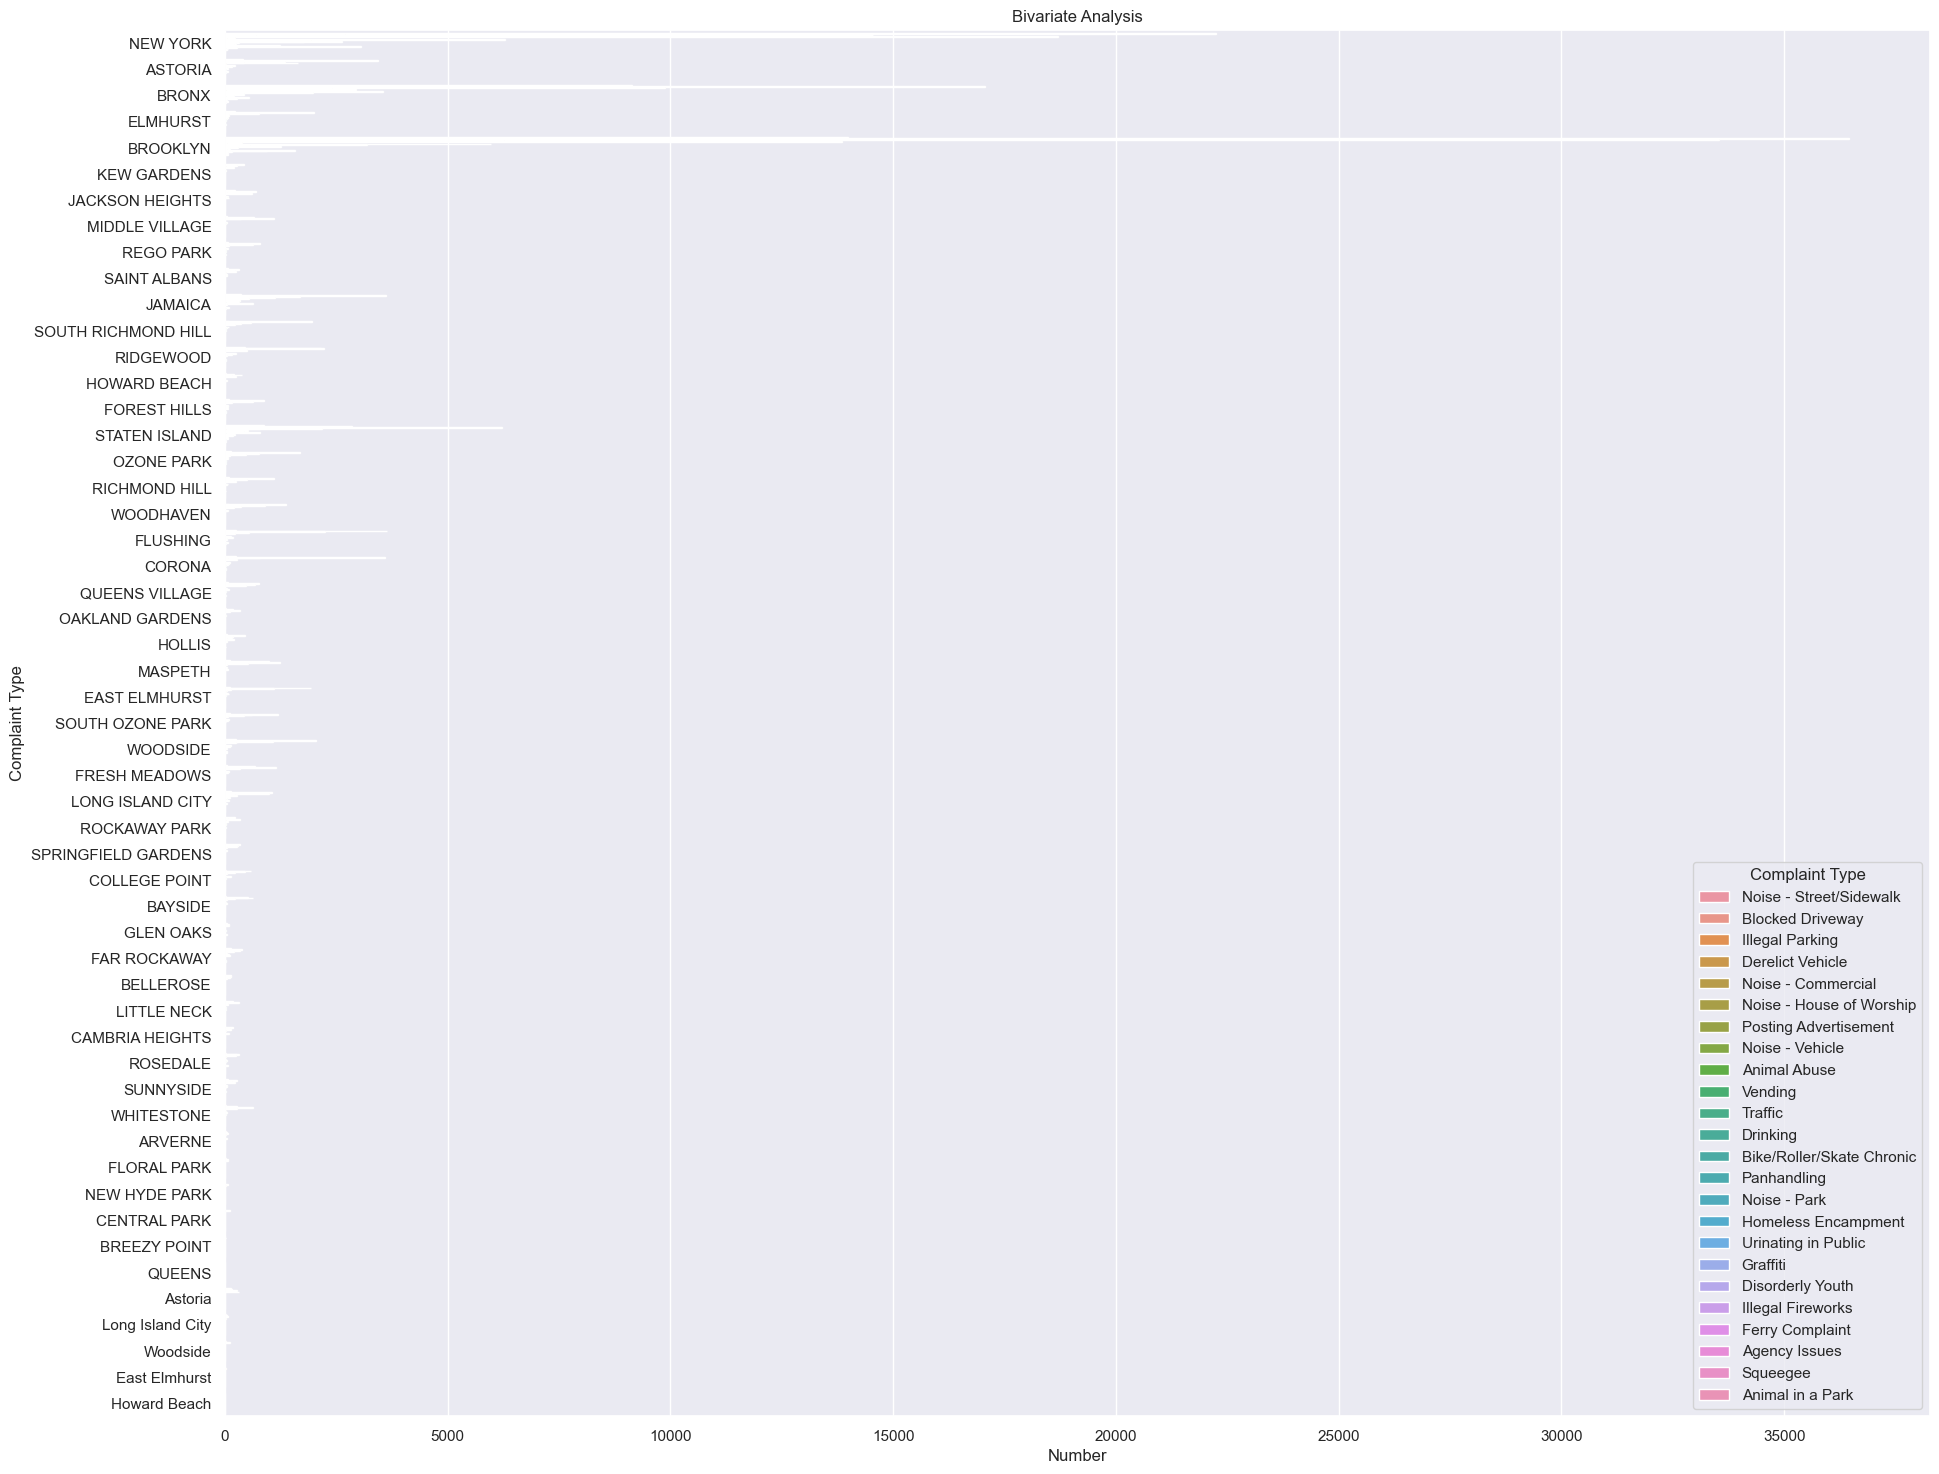

In [177]:

plt.figure(figsize=(22,18))
x_variable = "Complaint Type"
y_variable = "City"

sns.countplot(data=df, y=y_variable, hue=x_variable)
plt.ylabel(x_variable)
plt.xlabel("Number")
plt.title("Bivariate Analysis")



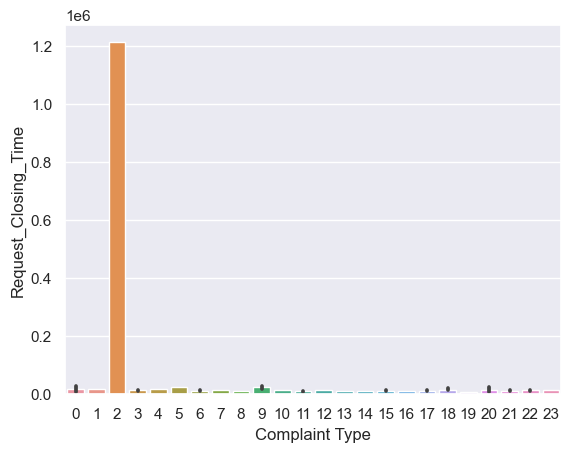

In [135]:
sns.barplot(data=df_new, x="Complaint Type", y="Request_Closing_Time")
plt.show()

### Highest complaint is about parking and driveaway followed by Noise

In [136]:
df["Complaint Type"].value_counts(). head(8)


Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Name: Complaint Type, dtype: int64

### Queens has the longest request_closing time

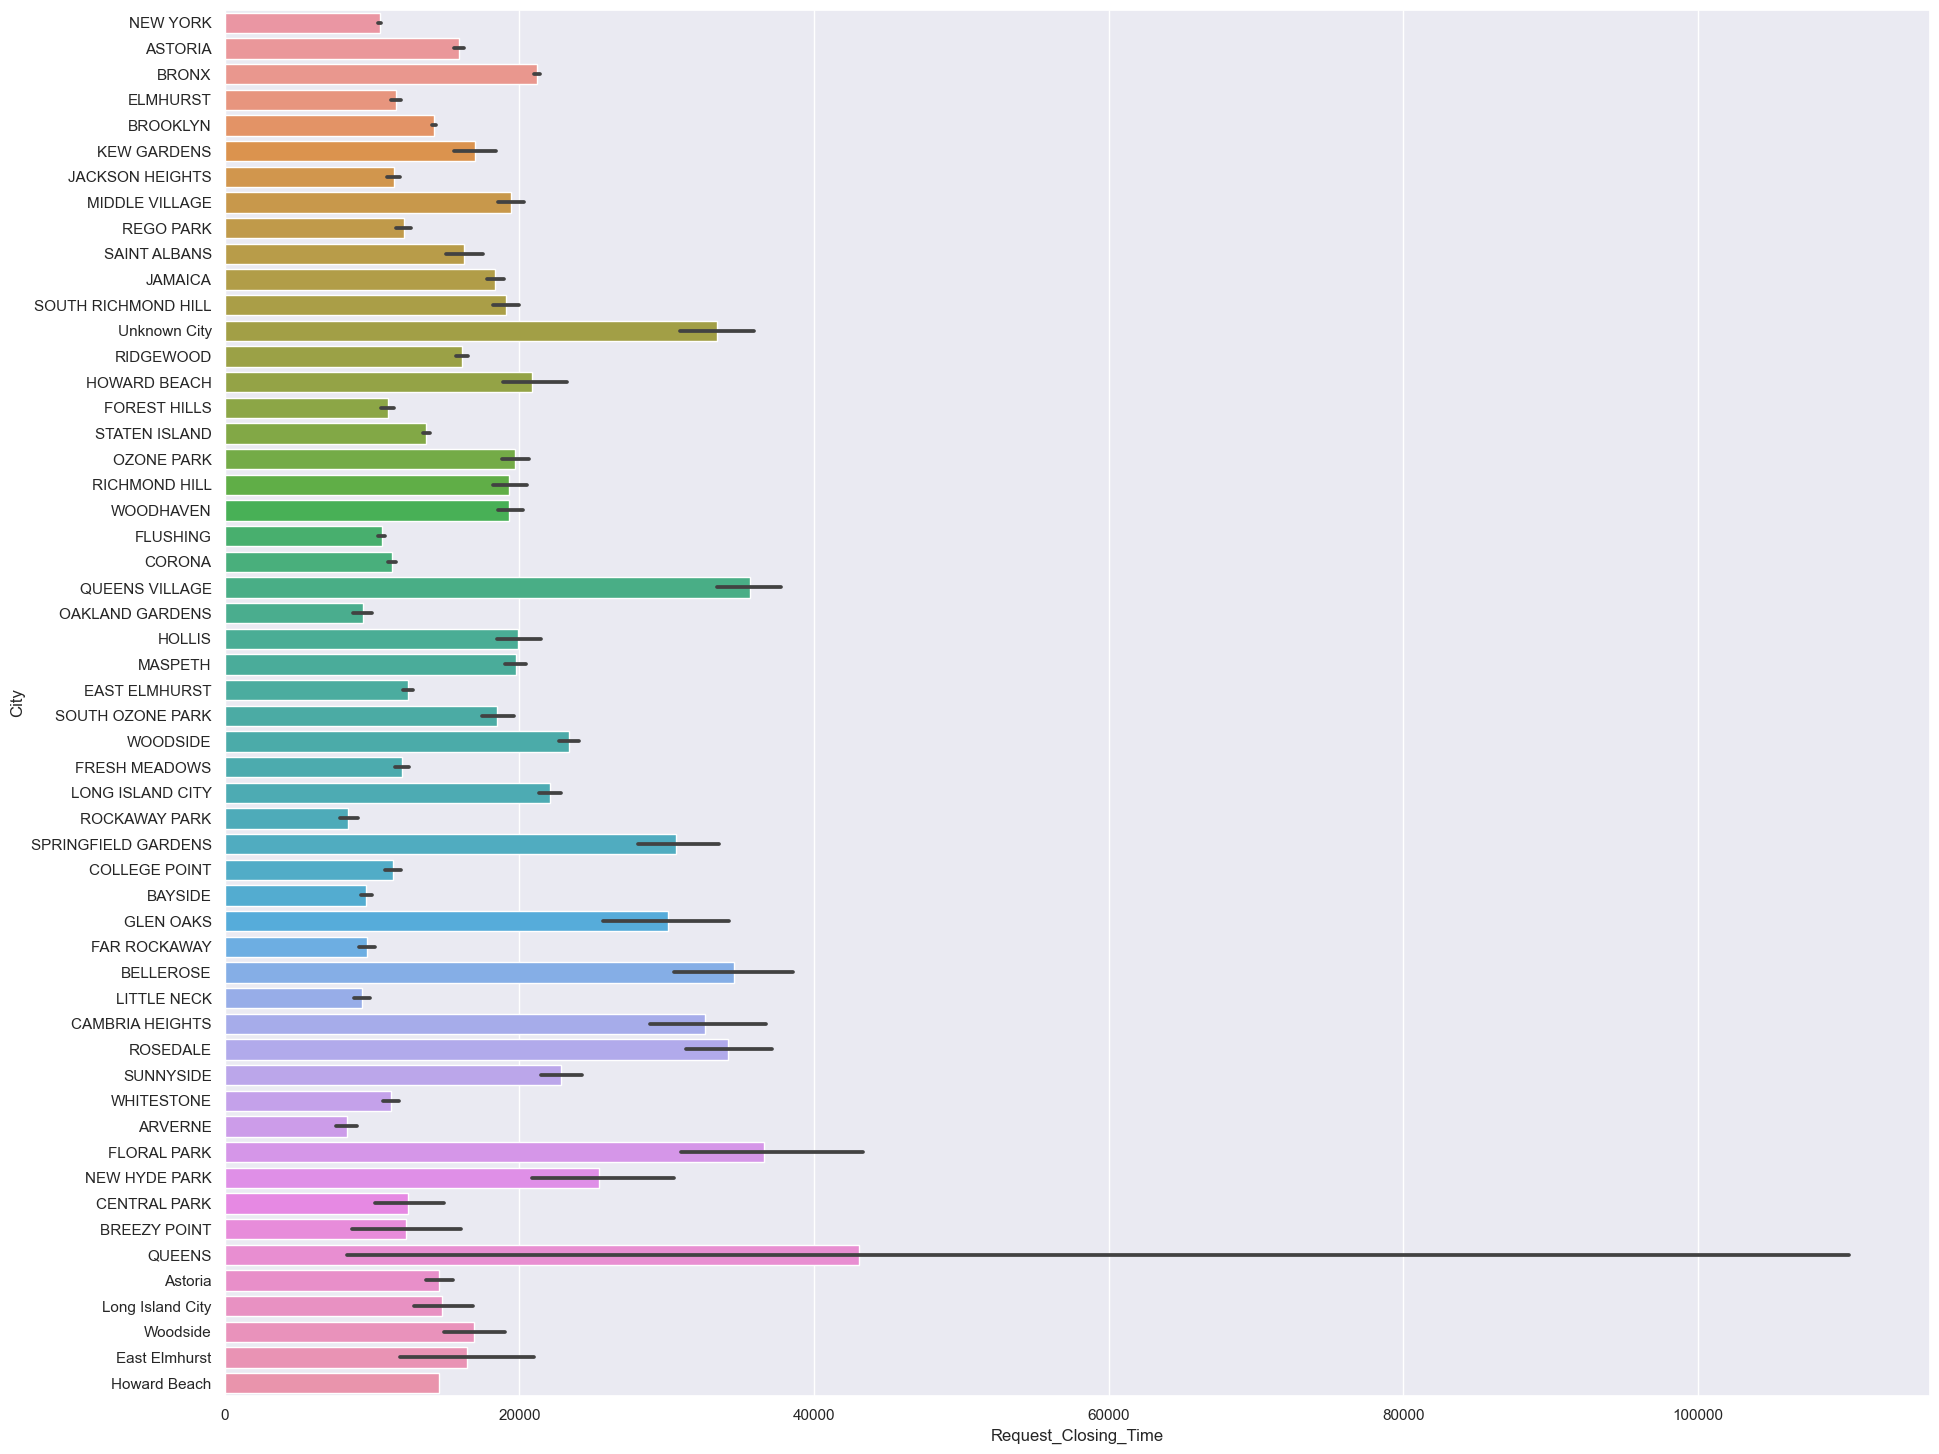

In [137]:
plt.figure(figsize=(22,18))
sns.barplot(data=df, x="Request_Closing_Time", y="City")
plt.show()



### Average Closing time, top 5 fastest closing complaints Type

In [138]:

avg_closing_time_by_type = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=True).head(5)
print(avg_closing_time_by_type)

Complaint Type
Posting Advertisement        7286.256259
Illegal Fireworks           10113.482558
Noise - Commercial          11085.760531
Noise - House of Worship    11391.087079
Noise - Park                12226.055515
Name: Request_Closing_Time, dtype: float64


### Highest number of incident occured in Street, i.e almost 80% of the total. Need more police force

In [139]:

df['Location Type'].value_counts()/len(df) * 100

Street/Sidewalk               82.667779
Store/Commercial               6.917143
Club/Bar/Restaurant            5.904959
Residential Building/House     2.432809
Park/Playground                1.336139
House of Worship               0.292957
Residential Building           0.146204
Highway                        0.072691
House and Store                0.067205
Parking Lot                    0.045809
Commercial                     0.029625
Vacant Lot                     0.026059
Roadway Tunnel                 0.011795
Subway Station                 0.010972
Bridge                         0.000549
Terminal                       0.000274
Ferry                          0.000274
Park                           0.000274
Name: Location Type, dtype: float64

### Manhattan Borough has the fastest closing time of cases

In [140]:
df.groupby('Borough')['Request_Closing_Time'].mean().sort_values(ascending=True)

Borough
MANHATTAN        10522.719650
STATEN ISLAND    13681.039977
BROOKLYN         14196.064694
QUEENS           16841.171159
BRONX            21188.041697
Unspecified      36716.285039
Name: Request_Closing_Time, dtype: float64

### Bronx has the slowest closing time

In [141]:

df.groupby('Borough')['Request_Closing_Time'].mean().sort_values(ascending=False)

Borough
Unspecified      36716.285039
BRONX            21188.041697
QUEENS           16841.171159
BROOKLYN         14196.064694
STATEN ISLAND    13681.039977
MANHATTAN        10522.719650
Name: Request_Closing_Time, dtype: float64

### No access is realated to parking. More complain is from driving and parking

In [142]:
df['Descriptor'].value_counts().sort_values(ascending=False).head(5)

No Access                        75888
Loud Music/Party                 69708
Posted Parking Sign Violation    27200
Partial Access                   24993
Loud Talking                     23810
Name: Descriptor, dtype: int64

### Highest number of police responded to the complaint has no evidence of the violation been reported. Panic Call

In [143]:
df['Resolution Description'].value_counts().head(5)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    107051
The Police Department responded to the complaint and took action to fix the condition.                                                      72917
The Police Department responded and upon arrival those responsible for the condition were gone.                                             71281
The Police Department responded to the complaint and determined that police action was not necessary.                                       47612
The Police Department issued a summons in response to the complaint.                                                                        37342
Name: Resolution Description, dtype: int64

### Highest Number of complain and type by city.

In [164]:

df. groupby("City")["Complaint Type"].value_counts().sort_values(ascending=False).head(5)

City      Complaint Type         
BROOKLYN  Blocked Driveway           36447
          Illegal Parking            33533
NEW YORK  Noise - Street/Sidewalk    22252
          Noise - Commercial         18692
BRONX     Blocked Driveway           17063
Name: Complaint Type, dtype: int64

### NUmber of Complaints by Complaint Types

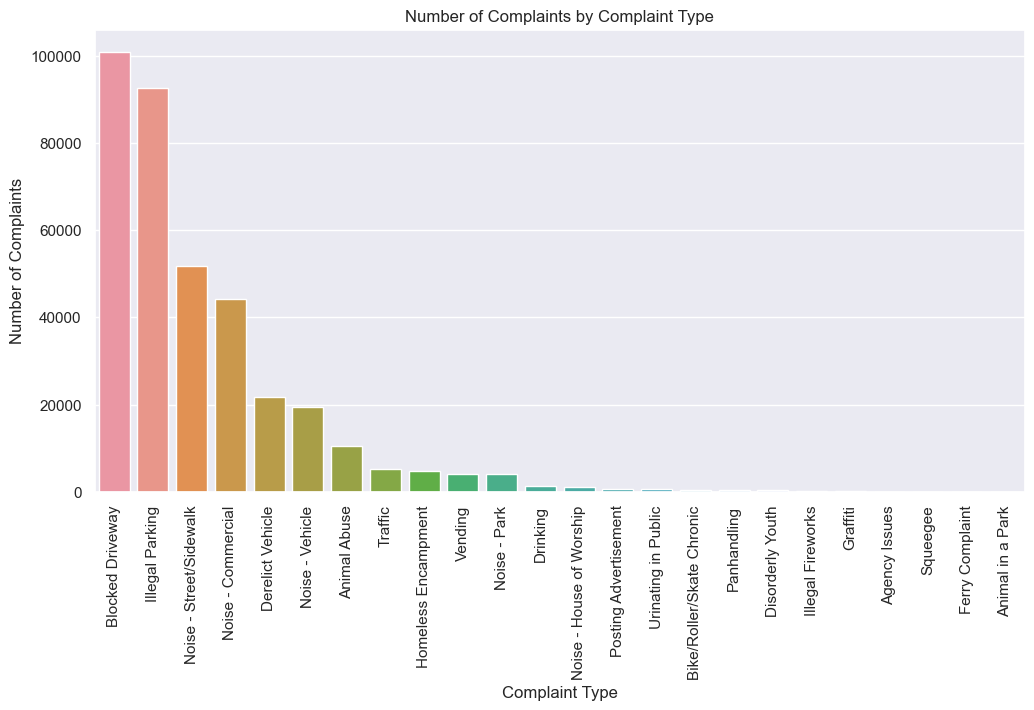

In [145]:

complaint_counts = df['Complaint Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)

plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Complaint Type')

plt.xticks(rotation=90)
plt.show()


### Number of Complaints by City

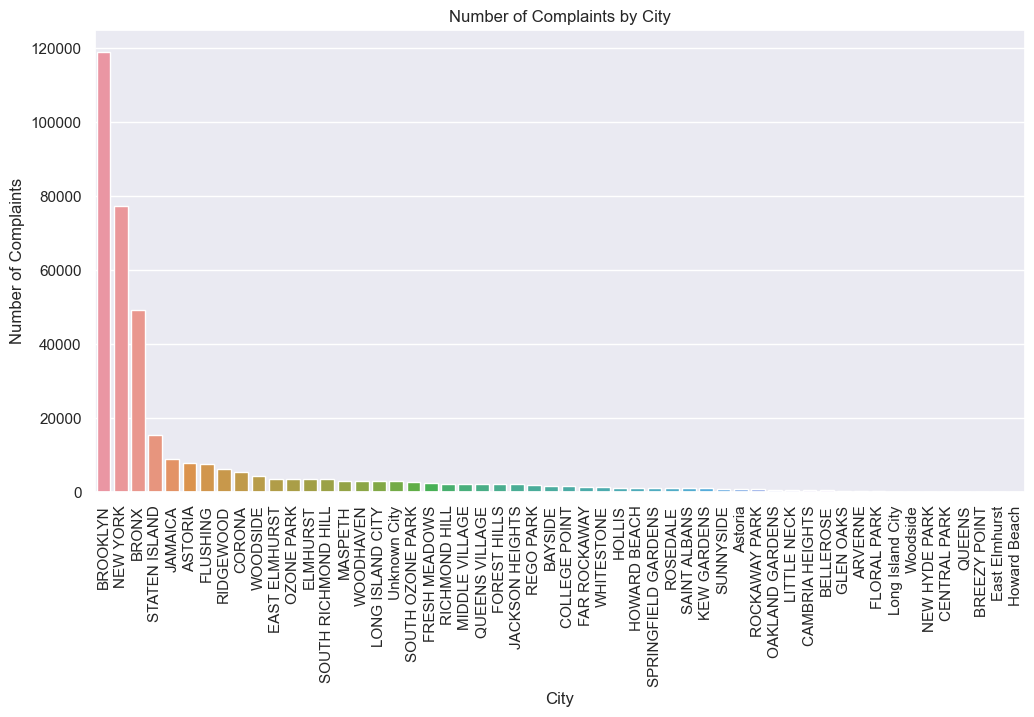

In [146]:
city_complaint_counts = df['City'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_complaint_counts.index, y=city_complaint_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by City')
plt.xticks(rotation=90)
plt.show()
